1. Import Library

In [ ]:
#Import Library Pendukung Praproses data & Analisis Data
import pandas as pd #data preparation
import numpy as np #data numerical operations & calculation
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
from collections import Counter #nge cek imbalance data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #transformasi data
from sklearn.preprocessing import MinMaxScaler #menskalakan dataset, standarisasi, normalisasi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #memecah data yg akam di training algoritma dengan data yg untuk testing
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

#Library algoritma untuk membangun model prediksi
from sklearn.neighbors import KNeighborsClassifier #k-NN
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #DT, RF (Random Forest), ERT (Extreme Randomized Trees), XGB (Extreme Gradient Boosting), LGBM (Light Gradient Boosting Machines)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, classification_report #evaluasi performa model (data, preparation, algoritma)
from sklearn.model_selection import GridSearchCV

In [ ]:
#Koneksi google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_nasabah = pd.read_csv('drive/MyDrive/training/nasabah_bank_mega.csv', parse_dates=['SubmissionDate'])
data_nasabah["Order Month"]=(data_nasabah['SubmissionDate'].dt.to_period('M'))
data_nasabah.head()

,IdCust,SubmissionDate,CreditFinancing,AmountCredit,TenorMonth,CustomerName,PhoneNumber,Age,Address,SubDistrict,District,City,Employment,Position,Company,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,PartnerOrGuarantorName,Relationship,DependentChildren,HomeStatus,Verification,Decision,Order Month
0,CUST-000210,2022-11-09,Motor Cycle,17650000,12,Junaid,8.225167e+10,61,Jl Bppn Handil Ii Rt 008,Sanipah,Samboja,Kutai Kartanegara,Karyawan Swasta Non Bank,Operator Gc,PT Mekar Buana Sejahtera,14,3500000,2500000,3600000,Suriansyah,Saudara,1,Milik Sendiri Sudah Lunas,Survey,Approve,2022-11
1,CUST-000211,2022-11-09,Car,235000000,60,Linda Rubiyanti,8.235457e+10,44,Perum Her 2 Blok I 4 No 57 66 00,Sepinggan,Balikpapan Selatan,Balikpapan,Pedagang,Pedagang Plastik,Toko Plastik,11,4500000,3300000,4680000,Ricky Effendy,Saudara,1,Milik Sendiri Sudah Lunas,Survey,Approve,2022-11
2,CUST-000212,2022-06-13,Loan Funds,8700000,12,Juwono,8.125337e+10,33,Jl Kh Dewantara Rt 002,Ambarawang Laut,Samboja,Kutai Kartanegara,Karyawan PNS/BUMN/BUMD,Kelurahanambarawang Laut,NaN,9,7100000,2900000,6000000,Stephanie F Papulele,Saudara,1,Milik Sendiri Sudah Lunas,Survey,Approve,2022-06
3,CUST-000213,2021-10-11,House,520000000,192,Jaliansyah,8.125450e+10,22,Jl M Hatta Rt 023,Muara Jawa Ulu,Muara Jawa,Kutai Kartanegara,Karyawan Swasta Non Bank,Operator Vibro Compa,PT Karebet Mas Indonesia,8,4400000,1600000,3600000,Sudirman Rj Mapiago,Keponakan,2,Milik Sendiri Sudah Lunas,Survey,Approve,2021-10
4,CUST-000214,2021-10-11,Mobile Phone,8700000,12,Saparudding,8.225558e+10,33,Jl Mahakam Tengah Rt 003 002,Muara Kembang,Muara Jawa,Kutai Kartanegara,Karyawan Swasta Non Bank,Kelapa Sawit,NaN,12,3900000,2400000,3780000,St Aminah,Saudara,3,Milik Sendiri Sudah Lunas,Survey,Approve,2021-10


In [ ]:
data_nasabah['RemainingIncome'] = (data_nasabah['CustomerIncome']+data_nasabah['HusbandOrWifeIncome'])-data_nasabah['MonthlyExpenses']
data_nasabah.head()

,IdCust,SubmissionDate,CreditFinancing,AmountCredit,TenorMonth,CustomerName,PhoneNumber,Age,Address,SubDistrict,District,City,Employment,Position,Company,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,PartnerOrGuarantorName,Relationship,DependentChildren,HomeStatus,Verification,Decision,Order Month,RemainingIncome
0,CUST-000210,2022-11-09,Motor Cycle,17650000,12,Junaid,8.225167e+10,61,Jl Bppn Handil Ii Rt 008,Sanipah,Samboja,Kutai Kartanegara,Karyawan Swasta Non Bank,Operator Gc,PT Mekar Buana Sejahtera,14,3500000,2500000,3600000,Suriansyah,Saudara,1,Milik Sendiri Sudah Lunas,Survey,Approve,2022-11,2400000
1,CUST-000211,2022-11-09,Car,235000000,60,Linda Rubiyanti,8.235457e+10,44,Perum Her 2 Blok I 4 No 57 66 00,Sepinggan,Balikpapan Selatan,Balikpapan,Pedagang,Pedagang Plastik,Toko Plastik,11,4500000,3300000,4680000,Ricky Effendy,Saudara,1,Milik Sendiri Sudah Lunas,Survey,Approve,2022-11,3120000
2,CUST-000212,2022-06-13,Loan Funds,8700000,12,Juwono,8.125337e+10,33,Jl Kh Dewantara Rt 002,Ambarawang Laut,Samboja,Kutai Kartanegara,Karyawan PNS/BUMN/BUMD,Kelurahanambarawang Laut,NaN,9,7100000,2900000,6000000,Stephanie F Papulele,Saudara,1,Milik Sendiri Sudah Lunas,Survey,Approve,2022-06,4000000
3,CUST-000213,2021-10-11,House,520000000,192,Jaliansyah,8.125450e+10,22,Jl M Hatta Rt 023,Muara Jawa Ulu,Muara Jawa,Kutai Kartanegara,Karyawan Swasta Non Bank,Operator Vibro Compa,PT Karebet Mas Indonesia,8,4400000,1600000,3600000,Sudirman Rj Mapiago,Keponakan,2,Milik Sendiri Sudah Lunas,Survey,Approve,2021-10,2400000
4,CUST-000214,2021-10-11,Mobile Phone,8700000,12,Saparudding,8.225558e+10,33,Jl Mahakam Tengah Rt 003 002,Muara Kembang,Muara Jawa,Kutai Kartanegara,Karyawan Swasta Non Bank,Kelapa Sawit,NaN,12,3900000,2400000,3780000,St Aminah,Saudara,3,Milik Sendiri Sudah Lunas,Survey,Approve,2021-10,2520000


2. Data Cleaning

In [ ]:
data_nasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   IdCust                  1636 non-null   object        
 1   SubmissionDate          1636 non-null   datetime64[ns]
 2   CreditFinancing         1636 non-null   object        
 3   AmountCredit            1636 non-null   int64         
 4   TenorMonth              1636 non-null   int64         
 5   CustomerName            1636 non-null   object        
 6   PhoneNumber             1636 non-null   float64       
 7   Age                     1636 non-null   int64         
 8   Address                 1632 non-null   object        
 9   SubDistrict             1633 non-null   object        
 10  District                1636 non-null   object        
 11  City                    1636 non-null   object        
 12  Employment              1633 non-null   object  

In [ ]:
data_nasabah.isnull().sum()

,0
IdCust,0
SubmissionDate,0
CreditFinancing,0
AmountCredit,0
TenorMonth,0
CustomerName,0
PhoneNumber,0
Age,0
Address,4
SubDistrict,3


In [ ]:
data_nasabah = data_nasabah.dropna(subset=['Address', 'SubDistrict', 'Employment'])
data_nasabah.isnull().sum()

,0
IdCust,0
SubmissionDate,0
CreditFinancing,0
AmountCredit,0
TenorMonth,0
CustomerName,0
PhoneNumber,0
Age,0
Address,0
SubDistrict,0


In [ ]:
data_duplication = data_nasabah[data_nasabah.duplicated()]
data_duplication.head(10)

,IdCust,SubmissionDate,CreditFinancing,AmountCredit,TenorMonth,CustomerName,PhoneNumber,Age,Address,SubDistrict,District,City,Employment,Position,Company,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,PartnerOrGuarantorName,Relationship,DependentChildren,HomeStatus,Verification,Decision,Order Month,RemainingIncome
431,CUST-000640,2022-04-16,Motor Cycle,26120000,36,Nasrullahi,8.215423e+10,45,Jl Ir Soekarno Rt 015,Muara Jawa Ulu,Muara Jawa,Kutai Kartanegara,Karyawan Swasta Non Bank,Sales Counter,Cv Surya Terang Handil,8,8900000,3400000,7380000,Son Haji,Saudara,1,Milik Sendiri Sudah Lunas,Survey,Approve,2022-04,4920000
432,CUST-000640,2022-04-16,Motor Cycle,26120000,36,Nasrullahi,8.215423e+10,45,Jl Ir Soekarno Rt 015,Muara Jawa Ulu,Muara Jawa,Kutai Kartanegara,Karyawan Swasta Non Bank,Sales Counter,Cv Surya Terang Handil,8,8900000,3400000,7380000,Son Haji,Saudara,1,Milik Sendiri Sudah Lunas,Survey,Approve,2022-04,4920000


In [ ]:
data_nasabah = data_nasabah.drop_duplicates()
data_duplication = data_nasabah[data_nasabah.duplicated()]
data_duplication.head(10)

,IdCust,SubmissionDate,CreditFinancing,AmountCredit,TenorMonth,CustomerName,PhoneNumber,Age,Address,SubDistrict,District,City,Employment,Position,Company,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,PartnerOrGuarantorName,Relationship,DependentChildren,HomeStatus,Verification,Decision,Order Month,RemainingIncome


In [ ]:
display(data_nasabah.describe(), data_nasabah.describe(include='object'))

,SubmissionDate,AmountCredit,TenorMonth,PhoneNumber,Age,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,DependentChildren,RemainingIncome
count,1627,1.627000e+03,1627.000000,1.627000e+03,1627.000000,1627.000000,1.627000e+03,1.627000e+03,1.627000e+03,1627.000000,1.627000e+03
mean,2022-04-23 22:52:44.105716224,1.187833e+08,51.149355,5.003073e+18,46.446835,9.992624,4.286915e+07,2.505470e+06,5.427781e+06,1.624462,3.994683e+07
min,2020-01-05 00:00:00,4.500000e+06,12.000000,8.113745e+08,-39.000000,5.000000,2.500000e+06,1.500000e+06,2.400000e+06,0.000000,-2.070000e+06
25%,2021-05-29 00:00:00,8.750000e+06,24.000000,8.133742e+10,34.000000,8.000000,4.650000e+06,2.000000e+06,4.260000e+06,1.000000,2.840000e+06
50%,2022-06-13 00:00:00,1.765000e+07,24.000000,8.215242e+10,45.000000,10.000000,6.600000e+06,2.500000e+06,5.400000e+06,2.000000,3.600000e+06
75%,2023-04-16 12:00:00,2.005000e+08,48.000000,8.524628e+10,57.000000,12.000000,8.300000e+06,3.000000e+06,6.540000e+06,2.000000,4.360000e+06
max,2023-12-31 00:00:00,5.200000e+08,192.000000,8.140000e+21,699.000000,20.000000,5.001000e+10,3.500000e+06,1.547000e+07,3.000000,5.000516e+10
std,NaN,1.670771e+08,56.345483,2.018044e+20,22.770800,2.354487,1.259957e+09,5.787979e+05,1.441464e+06,0.634953,1.259900e+09


,IdCust,CreditFinancing,CustomerName,Address,SubDistrict,District,City,Employment,Position,Company,PartnerOrGuarantorName,Relationship,HomeStatus,Verification,Decision
count,1627,1627,1627,1627,1627,1627,1627,1627,1627,495,1627,1627,1627,1627,1627
unique,1621,6,1621,1293,110,13,6,16,606,433,827,3,5,3,2
top,CUST-000733,Loan Funds,Juryansyah,Jl A Yani Rt 010,Sepinggan,Balikpapan Selatan,Balikpapan,Karyawan Swasta Non Bank,Operator /Buruh/Tenlap,Trans Retail Indonesia,Wahyudi,Keponakan,Milik Sendiri Sudah Lunas,Survey,Approve
freq,3,351,3,16,199,422,915,785,210,16,9,992,1236,1385,1415


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)

def unique_data(data_nasabah):
  data_unique = pd.DataFrame()
  data_unique['Columns']= data_nasabah.columns
  data_unique['Unique Count'] = [data_nasabah[col].nunique() for col in (data_nasabah.columns)]
  data_unique['Unique'] = [data_nasabah[col].unique() for col in (data_nasabah.columns)]
  return data_unique

unique_data(data_nasabah)

,Columns,Unique Count,Unique
0,IdCust,1621,"[CUST-000210, CUST-000211, CUST-000212, CUST-000213, CUST-000214, CUST-000215, CUST-000216, CUST-000217, CUST-000218, CUST-000219, CUST-000220, CUST-000221, CUST-000222, CUST-000223, CUST-000224, CUST-000225, CUST-000226, CUST-000227, CUST-000228, CUST-000229, CUST-000230, CUST-000231, CUST-000232, CUST-000233, CUST-000234, CUST-000235, CUST-000236, CUST-000237, CUST-000238, CUST-000239, CUST-000240, CUST-000241, CUST-000242, CUST-000243, CUST-000244, CUST-000245, CUST-000246, CUST-000247, CUST-000248, CUST-000249, CUST-000250, CUST-000251, CUST-000252, CUST-000253, CUST-000254, CUST-000255, CUST-000256, CUST-000257, CUST-000258, CUST-000259, CUST-000260, CUST-000261, CUST-000262, CUST-000263, CUST-000264, CUST-000265, CUST-000266, CUST-000267, CUST-000268, CUST-000269, CUST-000270, CUST-000271, CUST-000272, CUST-000273, CUST-000274, CUST-000275, CUST-000276, CUST-000277, CUST-000278, CUST-000279, CUST-000280, CUST-000281, CUST-000282, CUST-000283, CUST-000284, CUST-000285, CUST-000286, CUST-000287, CUST-000288, CUST-000289, CUST-000290, CUST-000291, CUST-000292, CUST-000293, CUST-000294, CUST-000295, CUST-000296, CUST-000297, CUST-000298, CUST-000299, CUST-000300, CUST-000301, CUST-000302, CUST-000303, CUST-000304, CUST-000305, CUST-000306, CUST-000307, CUST-000308, CUST-000309, ...]"
1,SubmissionDate,541,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00:00, 2021-12-15 00:00:00, 2020-11-19 00:00:00, 2022-11-29 00:00:00, 2020-08-26 00:00:00, 2022-07-17 00:00:00, 2021-10-12 00:00:00, 2021-10-31 00:00:00, 2020-03-21 00:00:00, 2023-07-07 00:00:00, 2023-06-25 00:00:00, 2020-08-03 00:00:00, 2023-12-18 00:00:00, 2023-06-04 00:00:00, 2023-12-02 00:00:00, 2021-02-09 00:00:00, 2021-01-02 00:00:00, 2022-10-29 00:00:00, 2021-12-24 00:00:00, ...]"
2,CreditFinancing,6,"[Motor Cycle, Car, Loan Funds, House, Mobile Phone, Computer]"
3,AmountCredit,17,"[17650000, 235000000, 8700000, 520000000, 16500000, 8750000, 200500000, 21760000, 450000000, 20050000, 16300000, 18350000, 26120000, 23170000, 4500000, 180000000, 6500000]"
4,TenorMonth,7,"[12, 60, 192, 24, 48, 180, 36]"
5,CustomerName,1621,"[Junaid, Linda Rubiyanti, Juwono, Jaliansyah, Saparudding, Eddy Mandala, Eddy Susanto, Agustaniah, Johan Septiansyah, Joko Sunarno, Mohammad Jajuli, Nurlela, Raja Vanaldo Boan

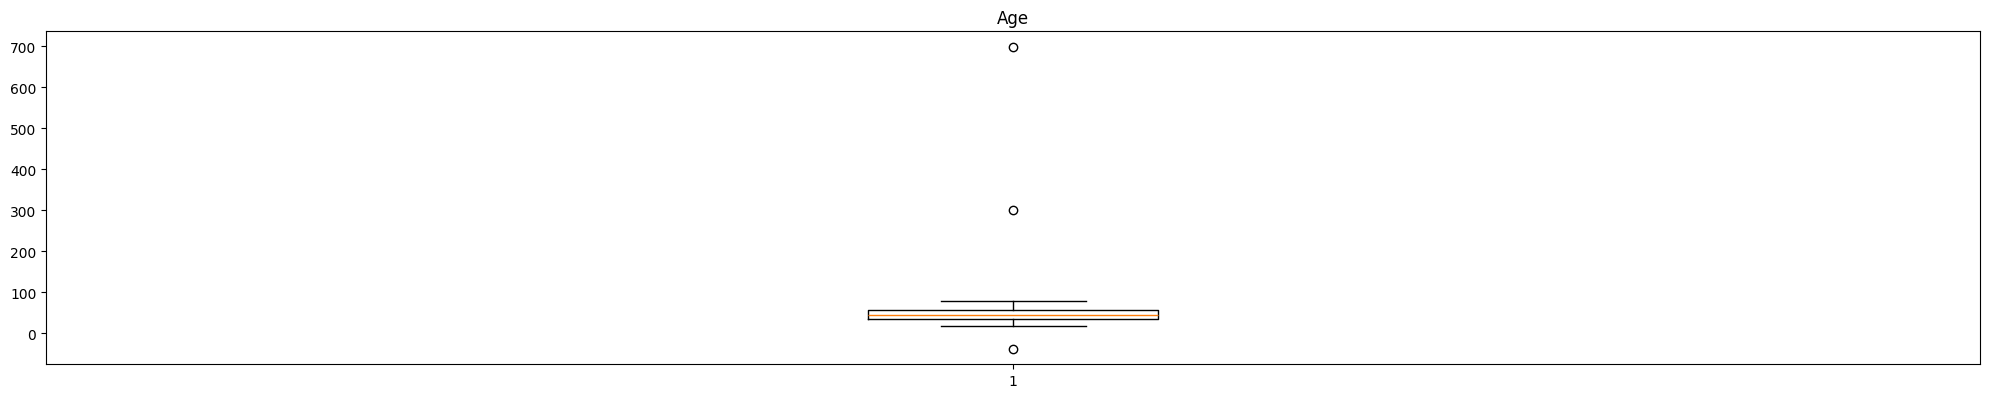

In [ ]:
variable = ['Age']
plt.figure(figsize=(20,15))
for idx, col in enumerate(variable, start=1 ):
  plt.subplot(4,1, idx)
  plt.boxplot(x=data_nasabah[col])
  plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
data_nasabah[ (data_nasabah['Age'] > 200) | (data_nasabah['Age'] < 1) ]

,IdCust,SubmissionDate,CreditFinancing,AmountCredit,TenorMonth,CustomerName,PhoneNumber,Age,Address,SubDistrict,District,City,Employment,Position,Company,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,PartnerOrGuarantorName,Relationship,DependentChildren,HomeStatus,Verification,Decision,Order Month,RemainingIncome
708,CUST-000913,2020-12-02,Car,235000000,60,Lilik Purwati,8.214840e+10,-39,Asrama Sentosa I Blok D No 05 19 00,Klandasan Ulu,Balikpapan Selatan,Balikpapan,Karyawan Swasta Non Bank,Staff,NaN,13,7700000,2800000,6300000,Natalia Elizabeth Palandeng,Keponakan,2,Kontrak,Deskcall,Approve,2020-12,4200000
887,CUST-001093,2023-10-15,Mobile Phone,8750000,24,Zainal Abidin,8.215106e+10,699,Jl Penggalang No 17 34 00,Damai,Balikpapan Selatan,Balikpapan,Karyawan Swasta Non Bank,Staff,Modular,11,8400000,3400000,7080000,Zet Habib,Keponakan,2,Milik Sendiri Sudah Lunas,Deskcall,Approve,2023-10,4720000
1226,CUST-001434,2022-12-05,Motor Cycle,20050000,24,Yagus,8.225176e+10,300,Jl Klamono Gatu No 10 74 00,Muara Rapak,Balikpapan Utara,Balikpapan,Karyawan Swasta Non Bank,Operator /Buruh/Tenlap,PT Matahari Putra Prima Tbk,8,5300000,2700000,4800000,Yarham,Saudara,1,Milik Orang Tua,Survey,Approve,2022-12,3200000


In [ ]:
data_nasabah = data_nasabah.drop([708,887,1226],axis=0)
data_nasabah[ (data_nasabah['Age'] > 200) | (data_nasabah['Age'] < 1) ]

,IdCust,SubmissionDate,CreditFinancing,AmountCredit,TenorMonth,CustomerName,PhoneNumber,Age,Address,SubDistrict,District,City,Employment,Position,Company,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,PartnerOrGuarantorName,Relationship,DependentChildren,HomeStatus,Verification,Decision,Order Month,RemainingIncome


In [ ]:
data_nasabah.to_excel("drive/MyDrive/training/data_bankMega_clean.xlsx", index=False)

3. Data Visualization

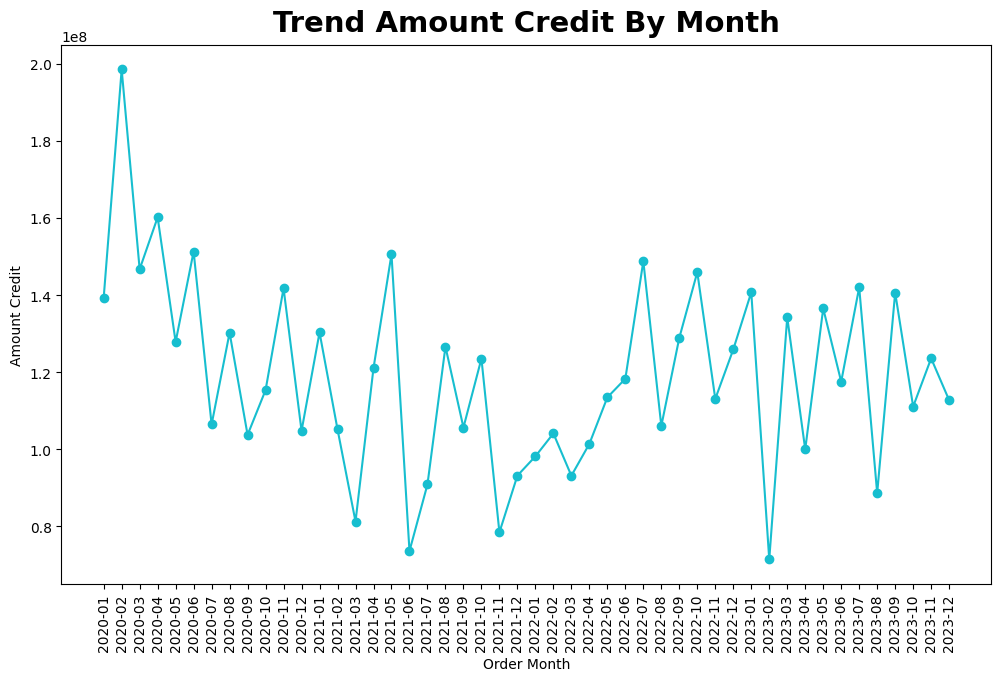

Maximum Amount Credit: 198556666.67 pada bulan 2020-02
Minimum Amount Credit: 71401428.57 pada bulan 2023-02


In [ ]:
trendCredit=data_nasabah.groupby('Order Month')['AmountCredit'].mean().reset_index()
trendCredit['Order Month'] = trendCredit['Order Month'].astype(str)
plt.figure(figsize=(12, 7))
plt.plot(trendCredit['Order Month'].astype(str), trendCredit['AmountCredit'], marker='o', linestyle='-', color='#17becf', label='Amount Credit Trend')
plt.xlabel('Order Month')
plt.ylabel('Amount Credit')
plt.title('Trend Amount Credit By Month', size=21, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

max_value = trendCredit['AmountCredit'].max()
min_value = trendCredit['AmountCredit'].min()
max_month = trendCredit.loc[trendCredit['AmountCredit'] == max_value, 'Order Month'].values[0]
min_month = trendCredit.loc[trendCredit['AmountCredit'] == min_value, 'Order Month'].values[0]
print(f"Maximum Amount Credit: {max_value:.2f} pada bulan {max_month}")
print(f"Minimum Amount Credit: {min_value:.2f} pada bulan {min_month}")

Insight =
1. Rata-rata amount credit tertinggi itu sejumlah Rp.198556666 yang tercatat pada bulan February pada tahun 2020.
2. Rata-rata amount credit terendah itu sejumlah Rp.71401428 yang tercatat pada bulan February pada tahun 2023
3. Trend menunjukan penurunan rata-rata amount credit dari tahun 2020 hingga 2023

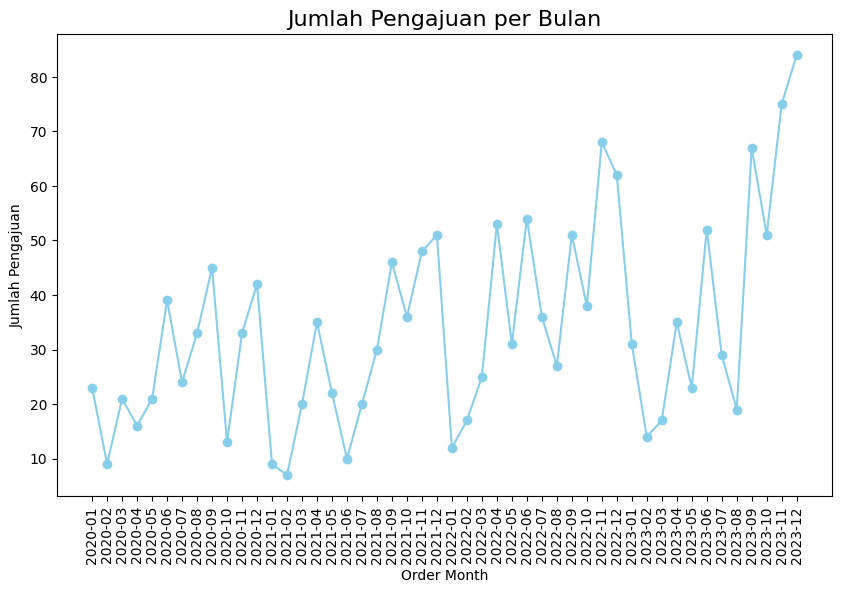

Maximum Pengajuan Credit: 84.00 pada bulan 2023-12
Minimum Pengajuan Credit: 7.00 pada bulan 2021-02


In [ ]:
jumlahPengajuan = (data_nasabah.groupby('Order Month').size().reset_index(name='Jumlah Pengajuan'))

plt.figure(figsize=(10,6))
plt.plot(jumlahPengajuan['Order Month'].astype(str), jumlahPengajuan['Jumlah Pengajuan'], color='skyblue', marker='o', linestyle='-')
plt.xlabel('Order Month')
plt.ylabel('Jumlah Pengajuan')
plt.title('Jumlah Pengajuan per Bulan', fontsize=16)
plt.xticks(rotation=90)
plt.show()

max_value = jumlahPengajuan['Jumlah Pengajuan'].max()
min_value = jumlahPengajuan['Jumlah Pengajuan'].min()
max_month = jumlahPengajuan.loc[jumlahPengajuan['Jumlah Pengajuan'] == max_value, 'Order Month'].values[0]
min_month = jumlahPengajuan.loc[jumlahPengajuan['Jumlah Pengajuan'] == min_value, 'Order Month'].values[0]
print(f"Maximum Pengajuan Credit: {max_value:.2f} pada bulan {max_month}")
print(f"Minimum Pengajuan Credit: {min_value:.2f} pada bulan {min_month}")

Insight =
1. Jumlah pengajuan kredit tertinggi itu berjumlah 84 pengajuan yang tercatat pada bulan December tahun 2023
2. Jumnlah pengajuan kredit terendah itu berjumlah 7 pengajuan yang tercatat pada bulan february pada tahun 2021
3. Trend pengajuan kredit memiliki trend peningkatan jumlah pengajuan kredit mulai dari tahun 2020 hingga 2023

,Jumlah Pengajuan,AmountCredit
Jumlah Pengajuan,1.000000,0.025519
AmountCredit,0.025519,1.000000


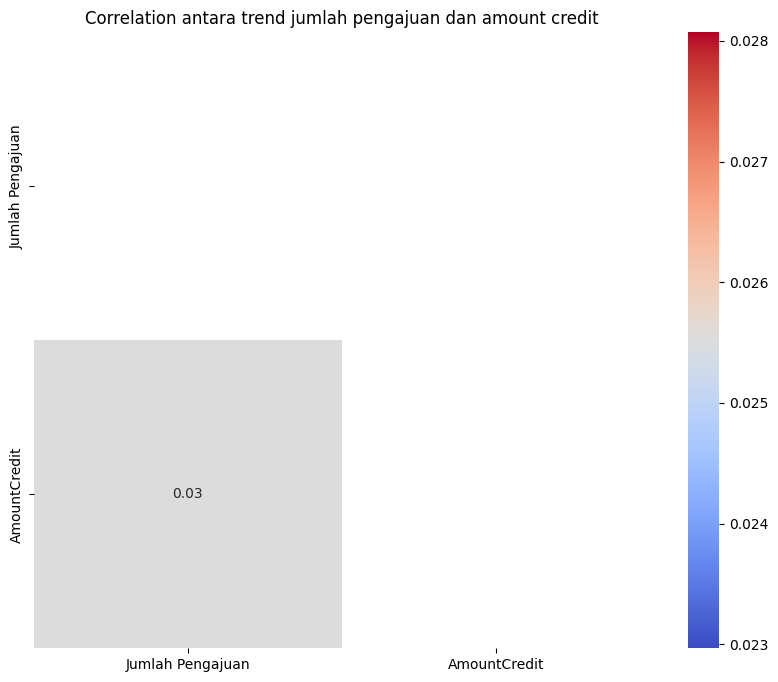

In [ ]:
jumlahPengajuan['Order Month'] = jumlahPengajuan['Order Month'].astype(str)
trendCredit['Order Month'] = trendCredit['Order Month'].astype(str)
corrTrend = pd.merge(jumlahPengajuan, trendCredit, on='Order Month')
correlation = corrTrend[['Jumlah Pengajuan', 'AmountCredit']].corr(method="spearman")
matriks=np.triu(correlation)
display(correlation)
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, mask=mask, cmap='coolwarm',  annot=True, fmt='.2f', square=True, )
plt.title("Correlation antara trend jumlah pengajuan dan amount credit")
plt.show()


Insight =
1. Jumlah pengajuan terhadap rata-rata amount credit setiap bulan dan tahunnya tidak terlalu berdampak besar, meskipun dengan jumlah pengajuan yang banyak, rata rata amount credit tidak terdampak besar atas jumlah pengajuan credit tersebut.

In [ ]:
data_nasabah.describe()

,SubmissionDate,AmountCredit,TenorMonth,PhoneNumber,Age,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,DependentChildren,RemainingIncome
count,1624,1.624000e+03,1624.000000,1.624000e+03,1624.000000,1624.000000,1.624000e+03,1.624000e+03,1.624000e+03,1624.000000,1.624000e+03
mean,2022-04-23 19:05:36.945812736,1.188403e+08,51.177340,5.012315e+18,45.941502,9.991379,4.293516e+07,2.504618e+06,5.426613e+06,1.624384,4.001317e+07
min,2020-01-05 00:00:00,4.500000e+06,12.000000,8.113745e+08,17.000000,5.000000,2.500000e+06,1.500000e+06,2.400000e+06,0.000000,-2.070000e+06
25%,2021-05-29 00:00:00,8.750000e+06,24.000000,8.133680e+10,34.000000,8.000000,4.600000e+06,2.000000e+06,4.260000e+06,1.000000,2.840000e+06
50%,2022-06-13 00:00:00,1.765000e+07,24.000000,8.215242e+10,45.000000,10.000000,6.600000e+06,2.500000e+06,5.400000e+06,2.000000,3.600000e+06
75%,2023-04-16 06:00:00,2.005000e+08,48.000000,8.524631e+10,57.000000,12.000000,8.300000e+06,3.000000e+06,6.540000e+06,2.000000,4.360000e+06
max,2023-12-31 00:00:00,5.200000e+08,192.000000,8.140000e+21,78.000000,20.000000,5.001000e+10,3.500000e+06,1.547000e+07,3.000000,5.000516e+10
std,NaN,1.671663e+08,56.389046,2.019907e+20,14.585365,2.354827,1.261120e+09,5.788399e+05,1.441966e+06,0.635214,1.261063e+09


,AmountCredit,TenorMonth,Age,CustomerIncome,MonthlyExpenses,DependentChildren,RemainingIncome
AmountCredit,1.000000,0.932975,-0.016497,0.029153,0.030232,-0.002471,0.036247
TenorMonth,0.932975,1.000000,-0.019176,0.030977,0.034153,-0.002192,0.040177
Age,-0.016497,-0.019176,1.000000,0.017462,0.019673,0.006304,0.015019
CustomerIncome,0.029153,0.030977,0.017462,1.000000,0.964290,0.050131,0.963905
MonthlyExpenses,0.030232,0.034153,0.019673,0.964290,1.000000,0.048405,0.985990
DependentChildren,-0.002471,-0.002192,0.006304,0.050131,0.048405,1.000000,0.055748
RemainingIncome,0.036247,0.040177,0.015019,0.963905,0.985990,0.055748,1.000000


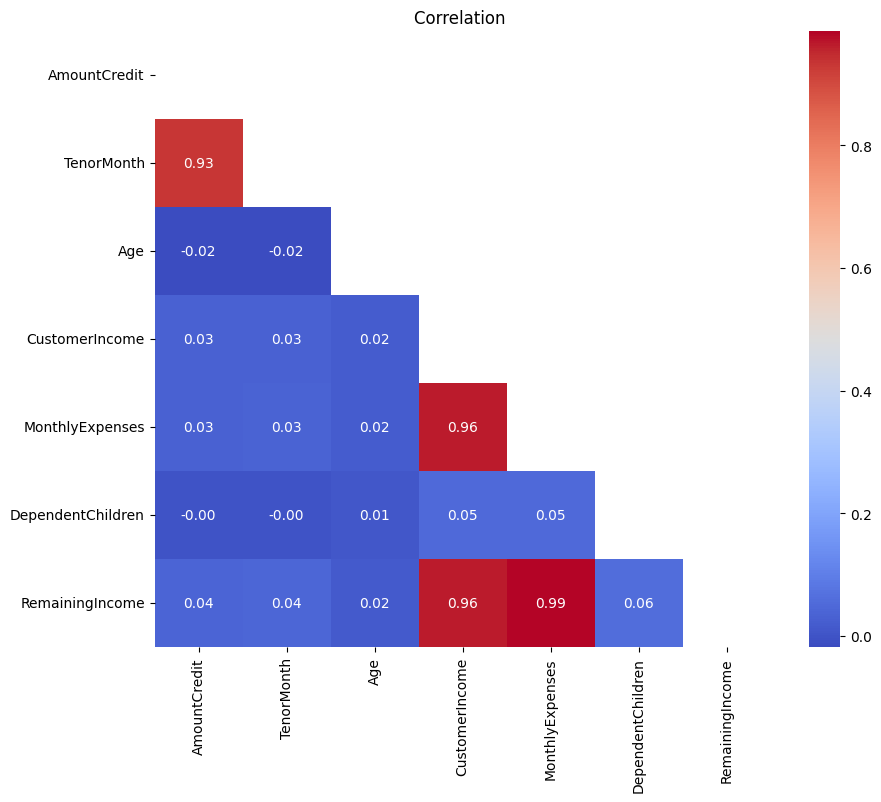

In [ ]:
corrSelection=['AmountCredit', 'TenorMonth', 'Age', 'CustomerIncome', 'MonthlyExpenses', 'DependentChildren', 'RemainingIncome'] #selectio data

#memanggil visualisasi plt, berupa grafik heat map
correlation = data_nasabah [corrSelection].corr(method="spearman")
matriks=np.triu(correlation)
display(correlation)
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, mask=mask, cmap='coolwarm',  annot=True, fmt='.2f', square=True, )
plt.title("Correlation ")
plt.show()

plt.show()

Insight=
1. Sangat sedikit correlation yang mengarah ke arah negatif, hanya beberapa saja seperti hubungan age dengan amount credit ataupun dengan tenor month, Meskipun begitu dampak negatif yang dihasilkan tidak sangat besar, sehingga tidak terlalu mempengaruhi.
2. Untuk correlation yang memiliki dampak positif yang besar seperti remaining income, customerIncome, dan MonthlyExpenses, itu karena mereka saling terhubung, karena untuk mendapatkan remainingIncome itu diperlukan customerIncome dan monthlyExpenses.
3. Semakin besar amount credit, aka sangat berpengaruh besar terhadap jumlah TenorMonth, dikarenakan dengan jumlah amount credit yang besar, dibutuhkan juga waktu yang lebih banyak untuk melunasinya.

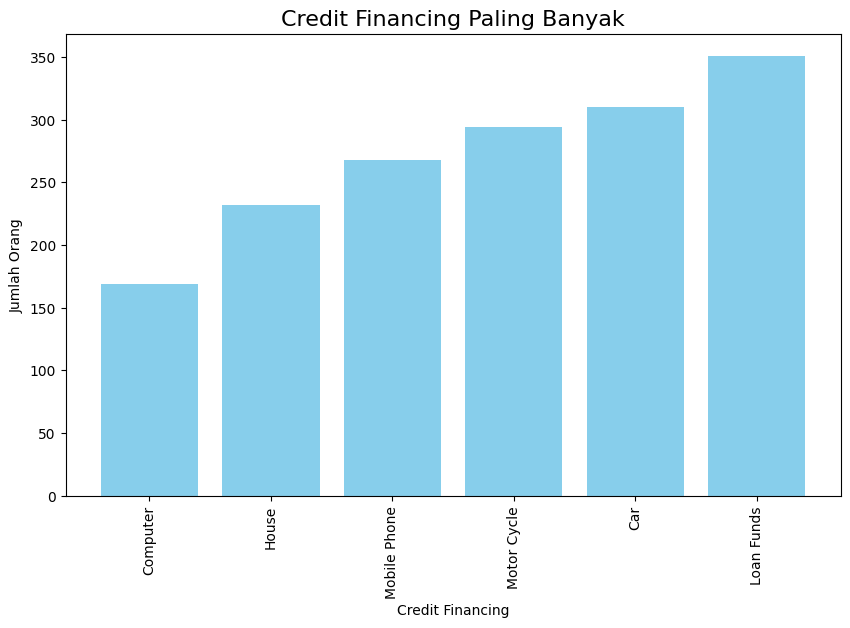

Maximum Credit Financing: Loan Funds  dengan jumlah 351.00
Minimum Credit Financing: Computer  dengan jumlah 169.00


In [ ]:
trendCreditFinancing= (data_nasabah.groupby('CreditFinancing').size().reset_index(name='Jumlah Orang').sort_values(by='Jumlah Orang', ascending=True))
plt.figure(figsize=(10,6))
plt.bar(trendCreditFinancing['CreditFinancing'], trendCreditFinancing['Jumlah Orang'], color='skyblue')
plt.xlabel('Credit Financing')
plt.ylabel('Jumlah Orang')
plt.title('Credit Financing Paling Banyak', fontsize=16)
plt.xticks(rotation=90)
plt.show()

max_value = trendCreditFinancing['Jumlah Orang'].max()
min_value = trendCreditFinancing['Jumlah Orang'].min()
max_credit = trendCreditFinancing.loc[trendCreditFinancing['Jumlah Orang'] == max_value, 'CreditFinancing'].values[0]
min_credit = trendCreditFinancing.loc[trendCreditFinancing['Jumlah Orang'] == min_value, 'CreditFinancing'].values[0]
print(f"Maximum Credit Financing: {max_credit}  dengan jumlah {max_value:.2f}")
print(f"Minimum Credit Financing: {min_credit}  dengan jumlah {min_value:.2f}")

Insight =
1. Loan Funds menjadi credit financing paling banyak digunakan untuk pengajuan credit dengan jumlah 351 kali pengajuan selama periode 2020 hingga 2023
2. Computer menjadi credit financing paling sedikit digunakan untuk pengajuan credit dengan jumlah 169 kali pengajuan selama periode 2020 hingga 2023

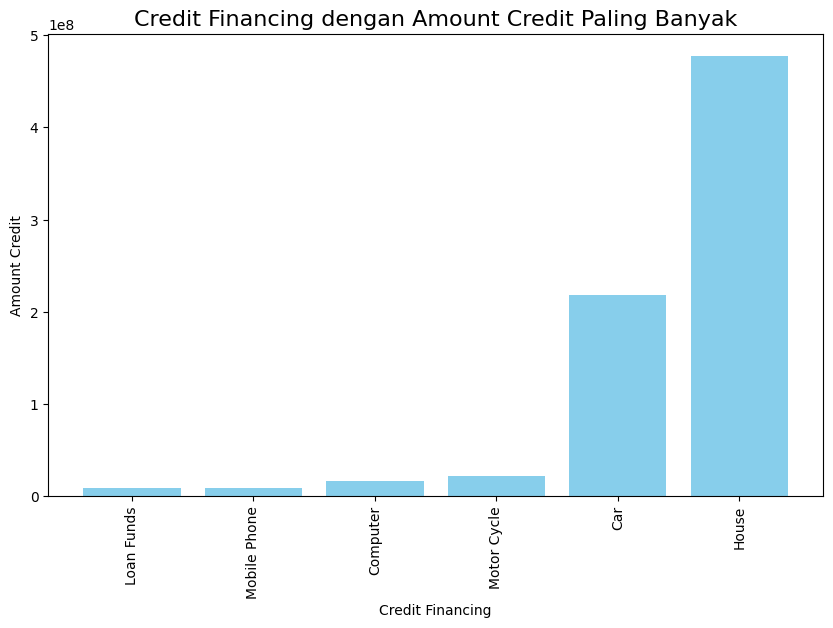

  CreditFinancing  AmountCredit
3      Loan Funds     8704274.0
4    Mobile Phone     8727052.0
1        Computer    16500000.0
5     Motor Cycle    21729966.0
0             Car   218017742.0
2           House   477758621.0


In [ ]:
financeAmount=data_nasabah.groupby('CreditFinancing')['AmountCredit'].mean().round(0).reset_index().sort_values(by='AmountCredit', ascending=True)
plt.figure(figsize=(10,6))
plt.bar(financeAmount['CreditFinancing'], financeAmount['AmountCredit'], color='skyblue')
plt.xlabel('Credit Financing')
plt.ylabel('Amount Credit')
plt.title('Credit Financing dengan Amount Credit Paling Banyak', fontsize=16)
plt.xticks(rotation=90)
plt.show()
print(financeAmount)

Insight =
1. Meskipun loan funds menjadi credit finance dengan pengajuan terbanyak tetapi untuk rata rata jumlah amount credit justru paling rendah dengan jumlah Rp.8704274
2. Dengan computer yang jumlah pengajuan credit finance paling rendah masih berada diatas dua kali lebih banyak dibandingkan dengan loan funds sebagai pengajuan credit finance terbanyak dengan rata-rata jumlah Rp.16500000

In [ ]:
data_nasabah.columns

Index(['IdCust', 'SubmissionDate', 'CreditFinancing', 'AmountCredit',
       'TenorMonth', 'CustomerName', 'PhoneNumber', 'Age', 'Address',
       'SubDistrict', 'District', 'City', 'Employment', 'Position', 'Company',
       'LengthOfWork', 'CustomerIncome', 'HusbandOrWifeIncome',
       'MonthlyExpenses', 'PartnerOrGuarantorName', 'Relationship',
       'DependentChildren', 'HomeStatus', 'Verification', 'Decision',
       'Order Month', 'RemainingIncome'],
      dtype='object')

In [ ]:
data_nasabah.head()

,IdCust,SubmissionDate,CreditFinancing,AmountCredit,TenorMonth,CustomerName,PhoneNumber,Age,Address,SubDistrict,District,City,Employment,Position,Company,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,PartnerOrGuarantorName,Relationship,DependentChildren,HomeStatus,Verification,Decision,Order Month,RemainingIncome
0,CUST-000210,2022-11-09,Motor Cycle,17650000,12,Junaid,8.225167e+10,61,Jl Bppn Handil Ii Rt 008,Sanipah,Samboja,Kutai Kartanegara,Karyawan Swasta Non Bank,Operator Gc,PT Mekar Buana Sejahtera,14,3500000,2500000,3600000,Suriansyah,Saudara,1,Milik Sendiri Sudah Lunas,Survey,Approve,2022-11,2400000
1,CUST-000211,2022-11-09,Car,235000000,60,Linda Rubiyanti,8.235457e+10,44,Perum Her 2 Blok I 4 No 57 66 00,Sepinggan,Balikpapan Selatan,Balikpapan,Pedagang,Pedagang Plastik,Toko Plastik,11,4500000,3300000,4680000,Ricky Effendy,Saudara,1,Milik Sendiri Sudah Lunas,Survey,Approve,2022-11,3120000
2,CUST-000212,2022-06-13,Loan Funds,8700000,12,Juwono,8.125337e+10,33,Jl Kh Dewantara Rt 002,Ambarawang Laut,Samboja,Kutai Kartanegara,Karyawan PNS/BUMN/BUMD,Kelurahanambarawang Laut,NaN,9,7100000,2900000,6000000,Stephanie F Papulele,Saudara,1,Milik Sendiri Sudah Lunas,Survey,Approve,2022-06,4000000
3,CUST-000213,2021-10-11,House,520000000,192,Jaliansyah,8.125450e+10,22,Jl M Hatta Rt 023,Muara Jawa Ulu,Muara Jawa,Kutai Kartanegara,Karyawan Swasta Non Bank,Operator Vibro Compa,PT Karebet Mas Indonesia,8,4400000,1600000,3600000,Sudirman Rj Mapiago,Keponakan,2,Milik Sendiri Sudah Lunas,Survey,Approve,2021-10,2400000
4,CUST-000214,2021-10-11,Mobile Phone,8700000,12,Saparudding,8.225558e+10,33,Jl Mahakam Tengah Rt 003 002,Muara Kembang,Muara Jawa,Kutai Kartanegara,Karyawan Swasta Non Bank,Kelapa Sawit,NaN,12,3900000,2400000,3780000,St Aminah,Saudara,3,Milik Sendiri Sudah Lunas,Survey,Approve,2021-10,2520000


In [ ]:
data_final = data_nasabah[['IdCust','CreditFinancing','AmountCredit','TenorMonth','Age','City','LengthOfWork','CustomerIncome','HusbandOrWifeIncome','MonthlyExpenses','DependentChildren', 'HomeStatus', 'RemainingIncome', 'Verification', 'Decision']]
data_final.head()

,IdCust,CreditFinancing,AmountCredit,TenorMonth,Age,City,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,DependentChildren,HomeStatus,RemainingIncome,Verification,Decision
0,CUST-000210,Motor Cycle,17650000,12,61,Kutai Kartanegara,14,3500000,2500000,3600000,1,Milik Sendiri Sudah Lunas,2400000,Survey,Approve
1,CUST-000211,Car,235000000,60,44,Balikpapan,11,4500000,3300000,4680000,1,Milik Sendiri Sudah Lunas,3120000,Survey,Approve
2,CUST-000212,Loan Funds,8700000,12,33,Kutai Kartanegara,9,7100000,2900000,6000000,1,Milik Sendiri Sudah Lunas,4000000,Survey,Approve
3,CUST-000213,House,520000000,192,22,Kutai Kartanegara,8,4400000,1600000,3600000,2,Milik Sendiri Sudah Lunas,2400000,Survey,Approve
4,CUST-000214,Mobile Phone,8700000,12,33,Kutai Kartanegara,12,3900000,2400000,3780000,3,Milik Sendiri Sudah Lunas,2520000,Survey,Approve


Pecahan 1 8750000.0
Pecahan 2 16500000.0
Pecahan 3 17650000.0
Pecahan 4 235000000.0
Pecahan 5 520000000.0


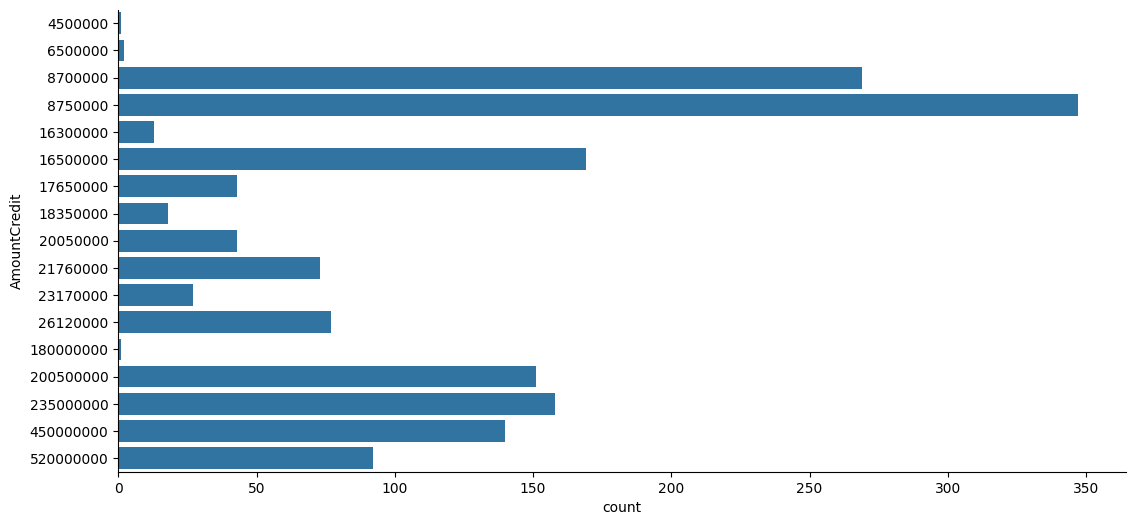

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(y='AmountCredit', data=data_final)
sns.despine()

print('Pecahan 1', data_final['AmountCredit'].quantile(q=0.20))
print('Pecahan 2', data_final['AmountCredit'].quantile(q=0.40))
print('Pecahan 3',data_final['AmountCredit'].quantile(q=0.50))
print('Pecahan 4',data_final['AmountCredit'].quantile(q=0.85))
print('Pecahan 5',data_final['AmountCredit'].quantile(q=1))

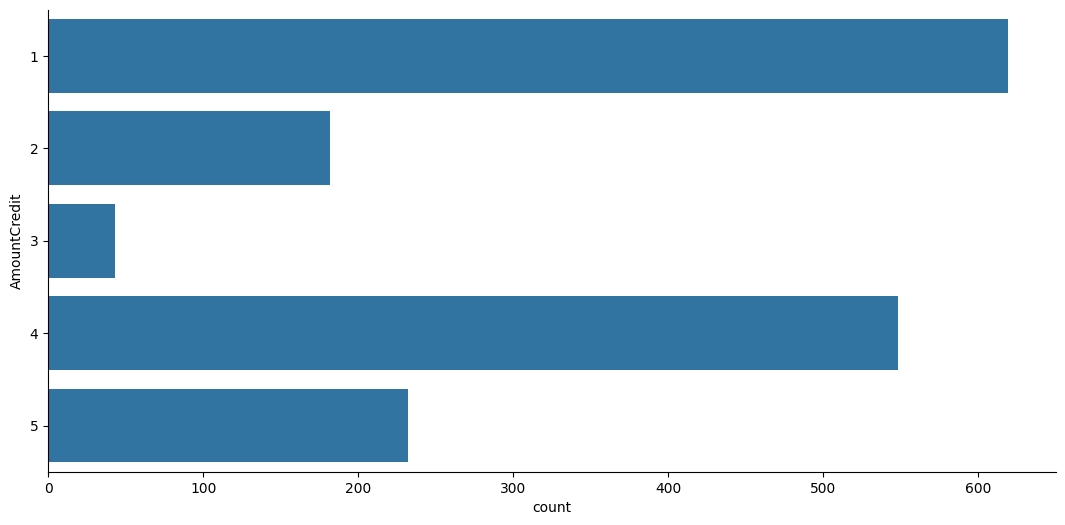

In [ ]:
def amountCredit(dataframe):
    dataframe.loc[dataframe['AmountCredit'] <= 8750000, 'AmountCredit'] = 1
    dataframe.loc[(dataframe['AmountCredit'] > 8750000) & (dataframe['AmountCredit'] <= 16500000), 'AmountCredit'] = 2
    dataframe.loc[(dataframe['AmountCredit'] > 16500000) & (dataframe['AmountCredit'] <= 17650000), 'AmountCredit'] = 3
    dataframe.loc[(dataframe['AmountCredit'] > 17650000) & (dataframe['AmountCredit'] <= 235000000), 'AmountCredit'] = 4
    dataframe.loc[(dataframe['AmountCredit'] > 235000000) & (dataframe['AmountCredit'] <= 520000000), 'AmountCredit'] = 5

    return dataframe

amountCredit(data_final);
plt.figure(figsize=(13,6))
sns.countplot(y='AmountCredit', data=data_final)
sns.despine()

Pecahan 1 4200000.0
Pecahan 2 5800000.0
Pecahan 3 6600000.0
Pecahan 4 9200000.0
Pecahan 5 50010000000.0


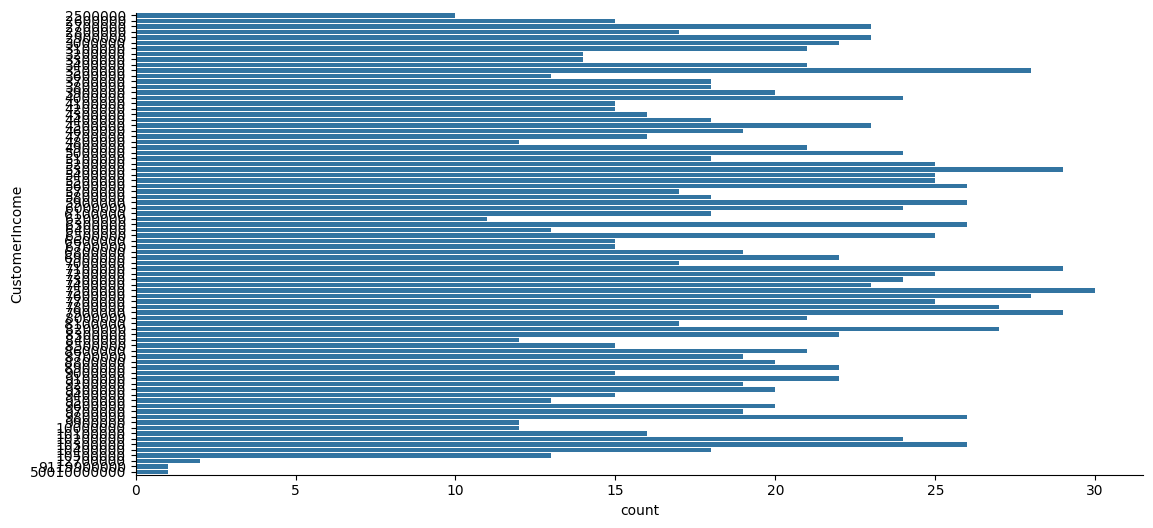

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(y='CustomerIncome', data=data_final)
sns.despine()

print('Pecahan 1', data_final['CustomerIncome'].quantile(q=0.20))
print('Pecahan 2', data_final['CustomerIncome'].quantile(q=0.40))
print('Pecahan 3',data_final['CustomerIncome'].quantile(q=0.50))
print('Pecahan 4',data_final['CustomerIncome'].quantile(q=0.85))
print('Pecahan 5',data_final['CustomerIncome'].quantile(q=1))

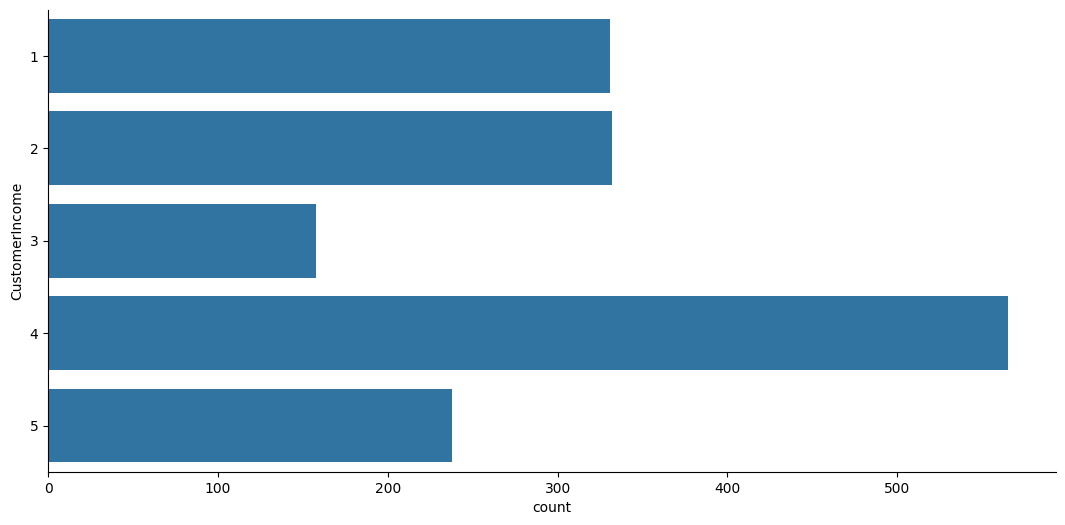

In [ ]:
def customerIncome(dataframe):
    dataframe.loc[dataframe['CustomerIncome'] <= 4200000, 'CustomerIncome'] = 1
    dataframe.loc[(dataframe['CustomerIncome'] > 4200000) & (dataframe['CustomerIncome'] <= 5800000), 'CustomerIncome'] = 2
    dataframe.loc[(dataframe['CustomerIncome'] > 5800000) & (dataframe['CustomerIncome'] <= 6600000), 'CustomerIncome'] = 3
    dataframe.loc[(dataframe['CustomerIncome'] > 6600000) & (dataframe['CustomerIncome'] <= 9200000), 'CustomerIncome'] = 4
    dataframe.loc[(dataframe['CustomerIncome'] > 9200000) & (dataframe['CustomerIncome'] <= 50010000000), 'CustomerIncome'] = 5

    return dataframe

customerIncome(data_final);
plt.figure(figsize=(13,6))
sns.countplot(y='CustomerIncome', data=data_final)
sns.despine()

Pecahan 1 1900000.0
Pecahan 2 2300000.0
Pecahan 3 2500000.0
Pecahan 4 3200000.0
Pecahan 5 3500000.0


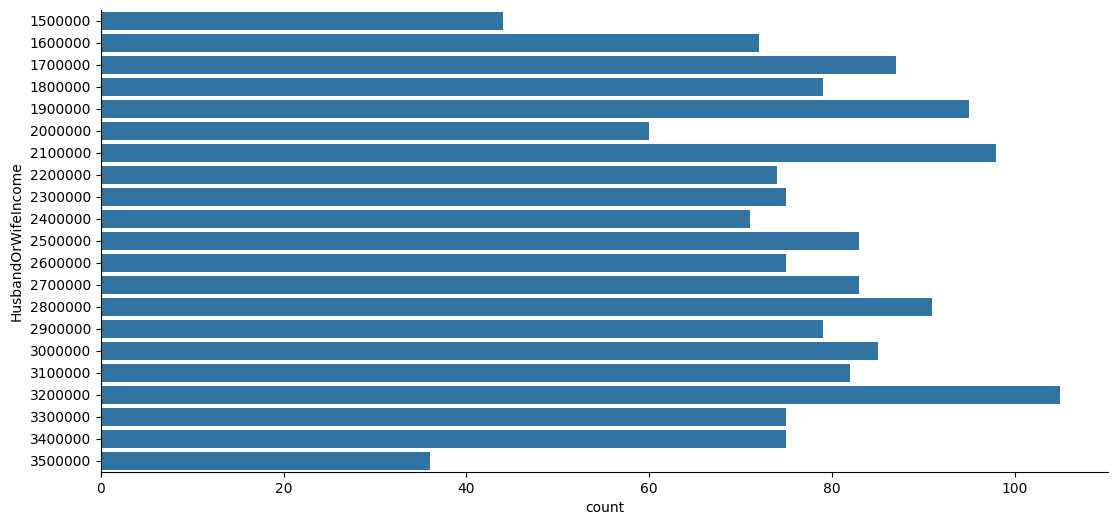

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(y='HusbandOrWifeIncome', data=data_final)
sns.despine()

print('Pecahan 1', data_final['HusbandOrWifeIncome'].quantile(q=0.20))
print('Pecahan 2', data_final['HusbandOrWifeIncome'].quantile(q=0.40))
print('Pecahan 3',data_final['HusbandOrWifeIncome'].quantile(q=0.50))
print('Pecahan 4',data_final['HusbandOrWifeIncome'].quantile(q=0.85))
print('Pecahan 5',data_final['HusbandOrWifeIncome'].quantile(q=1))

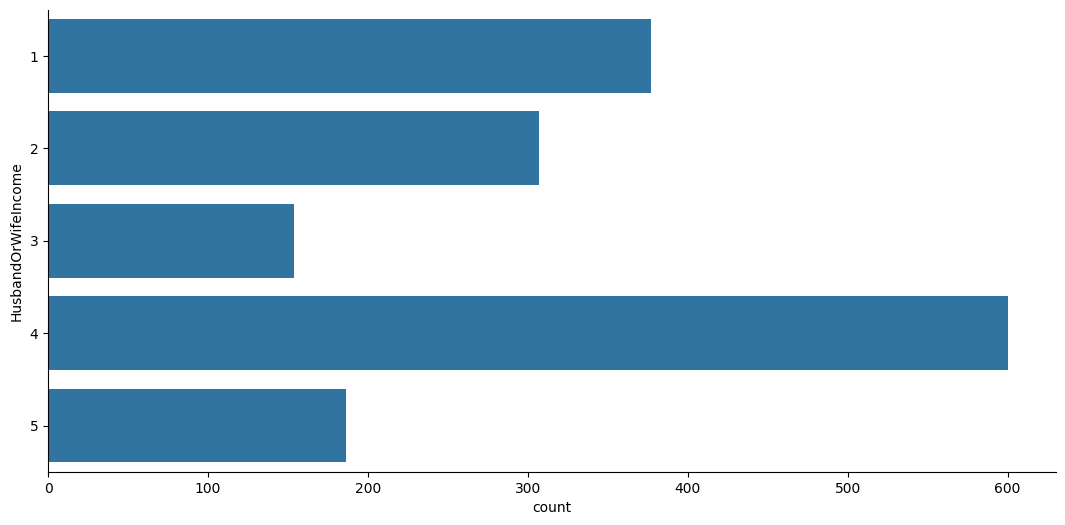

In [ ]:
def HusbandOrWifeIncome(dataframe):
    dataframe.loc[dataframe['HusbandOrWifeIncome'] <=  1900000, 'HusbandOrWifeIncome'] = 1
    dataframe.loc[(dataframe['HusbandOrWifeIncome'] >  1900000) & (dataframe['HusbandOrWifeIncome'] <= 2300000), 'HusbandOrWifeIncome'] = 2
    dataframe.loc[(dataframe['HusbandOrWifeIncome'] > 2300000) & (dataframe['HusbandOrWifeIncome'] <= 2500000), 'HusbandOrWifeIncome'] = 3
    dataframe.loc[(dataframe['HusbandOrWifeIncome'] > 2500000) & (dataframe['HusbandOrWifeIncome'] <= 3200000), 'HusbandOrWifeIncome'] = 4
    dataframe.loc[(dataframe['HusbandOrWifeIncome'] > 3200000) & (dataframe['HusbandOrWifeIncome'] <= 3500000), 'HusbandOrWifeIncome'] = 5

    return dataframe

HusbandOrWifeIncome(data_final);
plt.figure(figsize=(13,6))
sns.countplot(y='HusbandOrWifeIncome', data=data_final)
sns.despine()

Pecahan 1 4020000.0
Pecahan 2 4980000.0
Pecahan 3 5400000.0
Pecahan 4 7080000.0
Pecahan 5 15470000.0


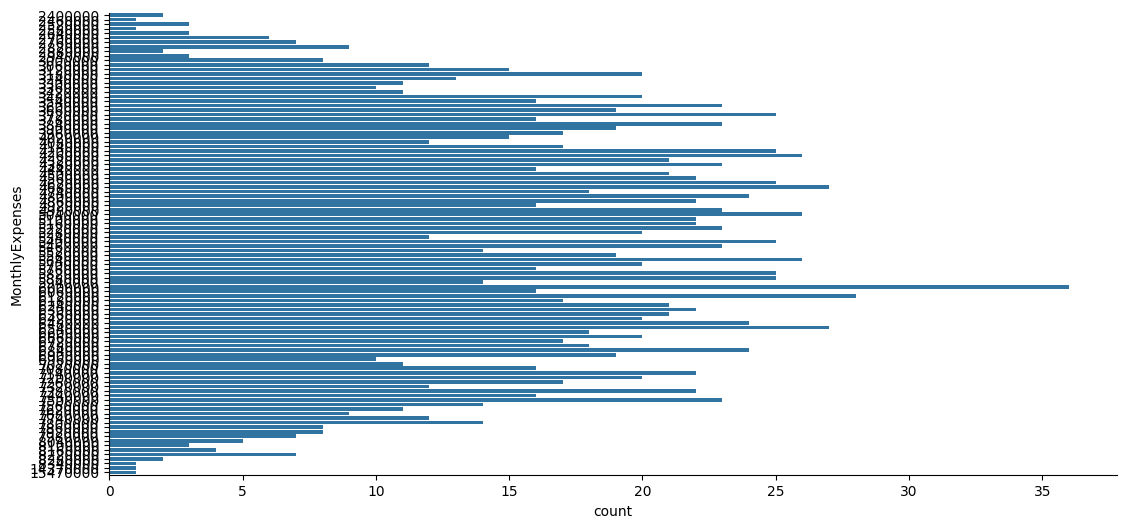

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(y='MonthlyExpenses', data=data_final)
sns.despine()

print('Pecahan 1', data_final['MonthlyExpenses'].quantile(q=0.20))
print('Pecahan 2', data_final['MonthlyExpenses'].quantile(q=0.40))
print('Pecahan 3',data_final['MonthlyExpenses'].quantile(q=0.50))
print('Pecahan 4',data_final['MonthlyExpenses'].quantile(q=0.85))
print('Pecahan 5',data_final['MonthlyExpenses'].quantile(q=1))

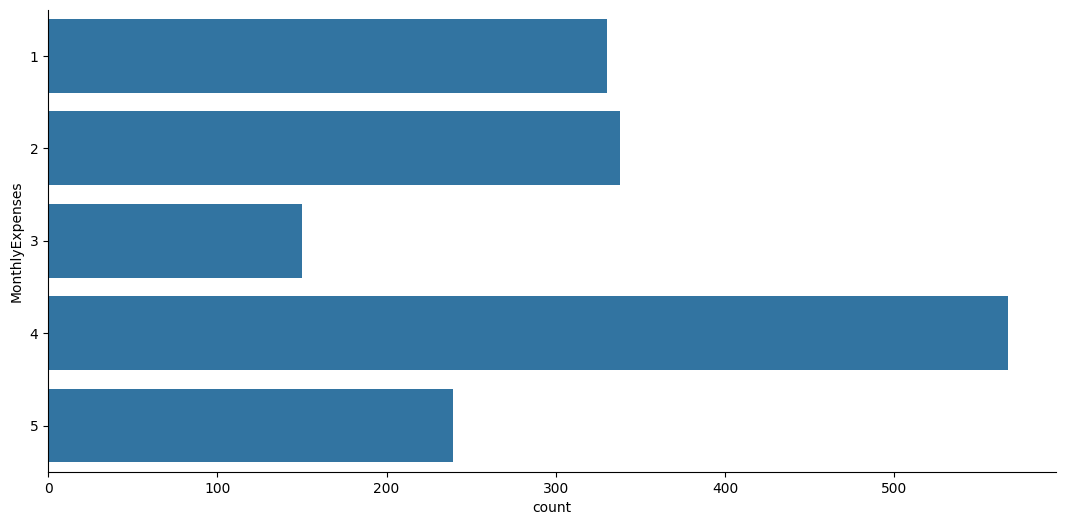

In [ ]:
def MonthlyExpenses(dataframe):
    dataframe.loc[dataframe['MonthlyExpenses'] <= 4020000, 'MonthlyExpenses'] = 1
    dataframe.loc[(dataframe['MonthlyExpenses'] > 4020000) & (dataframe['MonthlyExpenses'] <= 4980000), 'MonthlyExpenses'] = 2
    dataframe.loc[(dataframe['MonthlyExpenses'] > 4980000) & (dataframe['MonthlyExpenses'] <= 5400000), 'MonthlyExpenses'] = 3
    dataframe.loc[(dataframe['MonthlyExpenses'] > 5400000) & (dataframe['MonthlyExpenses'] <= 7080000), 'MonthlyExpenses'] = 4
    dataframe.loc[(dataframe['MonthlyExpenses'] > 7080000) & (dataframe['MonthlyExpenses'] <= 15470000), 'MonthlyExpenses'] = 5

    return dataframe
MonthlyExpenses(data_final);
plt.figure(figsize=(13,6))
sns.countplot(y='MonthlyExpenses', data=data_final)
sns.despine()

Pecahan 1 2680000.0
Pecahan 2 3320000.0
Pecahan 3 3600000.0
Pecahan 4 4720000.0
Pecahan 5 50005160000.0


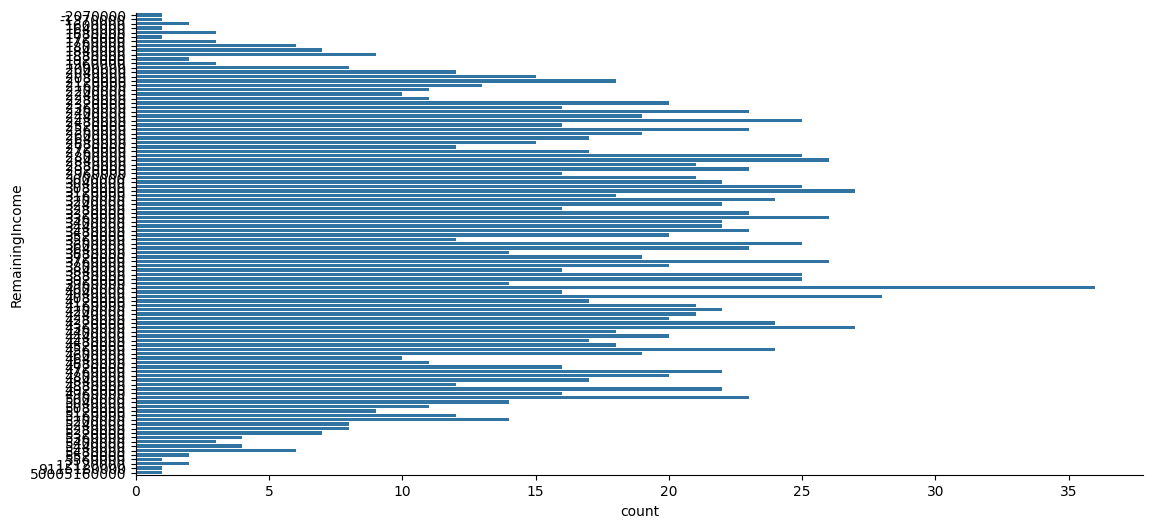

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(y='RemainingIncome', data=data_final)
sns.despine()

print('Pecahan 1', data_final['RemainingIncome'].quantile(q=0.20))
print('Pecahan 2', data_final['RemainingIncome'].quantile(q=0.40))
print('Pecahan 3',data_final['RemainingIncome'].quantile(q=0.50))
print('Pecahan 4',data_final['RemainingIncome'].quantile(q=0.85))
print('Pecahan 5',data_final['RemainingIncome'].quantile(q=1))

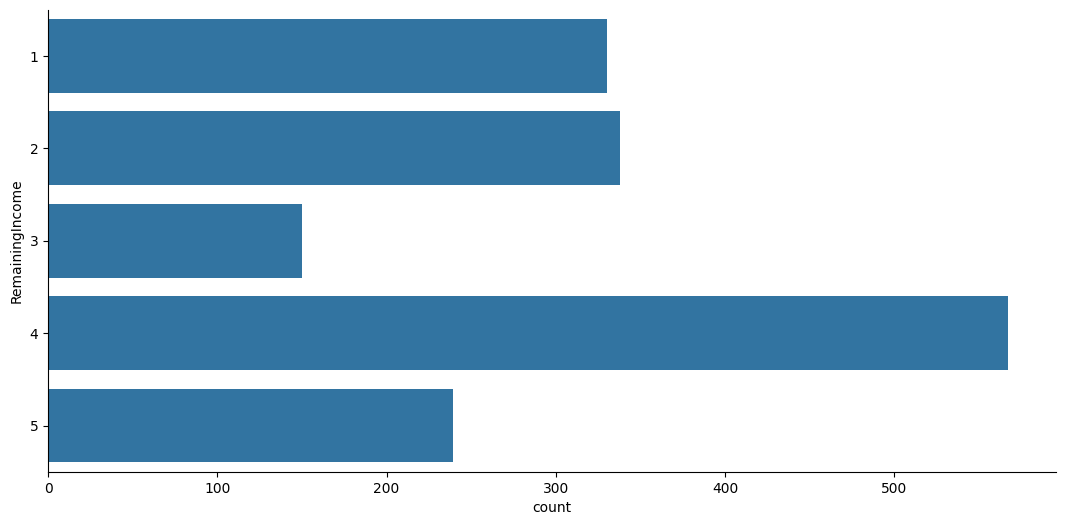

In [ ]:
def RemainingIncome(dataframe):
    dataframe.loc[dataframe['RemainingIncome'] <= 2680000, 'RemainingIncome'] = 1
    dataframe.loc[(dataframe['RemainingIncome'] > 2680000) & (dataframe['RemainingIncome'] <= 3320000), 'RemainingIncome'] = 2
    dataframe.loc[(dataframe['RemainingIncome'] > 3320000) & (dataframe['RemainingIncome'] <= 3600000), 'RemainingIncome'] = 3
    dataframe.loc[(dataframe['RemainingIncome'] > 3600000) & (dataframe['RemainingIncome'] <= 4720000), 'RemainingIncome'] = 4
    dataframe.loc[(dataframe['RemainingIncome'] > 4720000) & (dataframe['RemainingIncome'] <= 50005160000), 'RemainingIncome'] = 5

    return dataframe
RemainingIncome(data_final);
plt.figure(figsize=(13,6))
sns.countplot(y='RemainingIncome', data=data_final)
sns.despine()

In [ ]:
data_final.head()

,IdCust,CreditFinancing,AmountCredit,TenorMonth,Age,City,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,DependentChildren,HomeStatus,RemainingIncome,Verification,Decision
0,CUST-000210,Motor Cycle,3,12,61,Kutai Kartanegara,14,1,3,1,1,Milik Sendiri Sudah Lunas,1,Survey,Approve
1,CUST-000211,Car,4,60,44,Balikpapan,11,2,5,2,1,Milik Sendiri Sudah Lunas,2,Survey,Approve
2,CUST-000212,Loan Funds,1,12,33,Kutai Kartanegara,9,4,4,4,1,Milik Sendiri Sudah Lunas,4,Survey,Approve
3,CUST-000213,House,5,192,22,Kutai Kartanegara,8,2,1,1,2,Milik Sendiri Sudah Lunas,1,Survey,Approve
4,CUST-000214,Mobile Phone,1,12,33,Kutai Kartanegara,12,1,3,1,3,Milik Sendiri Sudah Lunas,1,Survey,Approve


In [ ]:
label_data = data_final
label_encoder = LabelEncoder()

for col in label_data[['CreditFinancing','City','HomeStatus','Verification','Decision']]:
  label_data[col] = label_encoder.fit_transform(label_data[col])

data_final=label_data
data_final.head(100)

<ipython-input-763-75f9375fec82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_data[col] = label_encoder.fit_transform(label_data[col])
<ipython-input-763-75f9375fec82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_data[col] = label_encoder.fit_transform(label_data[col])
<ipython-input-763-75f9375fec82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,IdCust,CreditFinancing,AmountCredit,TenorMonth,Age,City,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,DependentChildren,HomeStatus,RemainingIncome,Verification,Decision
0,CUST-000210,5,3,12,61,3,14,1,3,1,1,4,1,2,0
1,CUST-000211,0,4,60,44,1,11,2,5,2,1,4,2,2,0
2,CUST-000212,3,1,12,33,3,9,4,4,4,1,4,4,2,0
3,CUST-000213,2,5,192,22,3,8,2,1,1,2,4,1,2,0
4,CUST-000214,4,1,12,33,3,12,1,3,1,3,4,1,2,0
5,CUST-000215,1,2,24,52,1,11,2,4,2,2,4,2,2,0
6,CUST-000216,3,1,24,50,1,11,2,1,1,2,4,1,2,0
7,CUST-000217,3,1,24,74,1,6,1,4,1,2,3,1,2,1
8,CUST-000218,3,1,12,35,3,7,1,5,1,1,4,1,2,0
9,CUST-000219,3,1,12,36,3,11,1,2,1,2,4,1,2,0


In [ ]:
prediksi_nasabah = pd.read_csv("drive/MyDrive/training/nasabah_new_data.csv")
prediksi_nasabah.head()

,IdCust,SubmissionDate,CreditFinancing,AmountCredit,TenorMonth,CustomerName,PhoneNumber,Age,Address,SubDistrict,District,City,Employment,Position,Company,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,PartnerOrGuarantorName,Relationship,DependentChildren,HomeStatus,Verification
0,CUST-001849,8/9/2024,Mobile Phone,8700000,24,Beni Tito Anggoro,81346523585,49.0,Jl Blora 2 Gg Sido Rukun N0 27 22 00,Klandasan Ilir,Balikpapan Selatan,Balikpapan,Karyawan Swasta Non Bank,Pt Mitra Tri Daya Utama,PT Mitra Tri Daya Utama,11.0,7100000,2900000,6000000,Sugiyono,Keponakan,1,Milik Sendiri Sudah Lunas,Survey
1,CUST-001849,8/9/2024,Computer,16500000,24,Benny Robiantoro,85399151827,39.0,Jl A Yani Gg Swakarya Rt 021,Muara Jawa Pesisir,Muara Jawa,Kutai Kartanegara,Karyawan Swasta Non Bank,Operator /Buruh/Tenlap,PT Mitra Tri Daya Utama,9.0,8000000,2000000,6000000,Rika Herliana,Keponakan,1,Kontrak,Survey
2,CUST-001849,8/9/2024,Loan Funds,5500000,12,Berto M S Adsio Aritonang,81329297779,70.0,Bpp Regency Blok Ce T No 05 42 00,Sepinggan,Balikpapan Selatan,Balikpapan,Pedagang,Pedagang Pakaian,Toko Pakaian Ratih,10.0,8100000,3000000,6660000,Sugiyo,Keponakan,1,Milik Sendiri Sudah Lunas,Survey
3,CUST-001849,5/13/2024,Loan Funds,2500000,12,Bervin Ornella,85349940792,60.0,Jl Husni Thamrin Rt 008,Muara Kembang,Muara Jawa,Kutai Kartanegara,Karyawan PNS/BUMN/BUMD,Pns Honorer,-,11.0,3000000,1600000,2760000,Yudha Iriantho S,Saudara,1,Kontrak,Survey
4,CUST-001849,4/16/2024,Loan Funds,7525000,12,Beti Nurbaeti,85389782530,54.0,Ambarawang Darat Rt 005,Ambarawang Darat,Samboja,Kutai Kartanegara,Karyawan Swasta Non Bank,Operator /Buruh/Tenlap,Banjarsari Catering,14.0,3200000,1500000,2820000,Tri Rahmawan,Keponakan,1,Milik Orang Tua,Deskcall


In [ ]:
prediksi_nasabah['RemainingIncome'] = (prediksi_nasabah['CustomerIncome']+prediksi_nasabah['HusbandOrWifeIncome'])-prediksi_nasabah['MonthlyExpenses']
prediksi_nasabah.head()

,IdCust,SubmissionDate,CreditFinancing,AmountCredit,TenorMonth,CustomerName,PhoneNumber,Age,Address,SubDistrict,District,City,Employment,Position,Company,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,PartnerOrGuarantorName,Relationship,DependentChildren,HomeStatus,Verification,RemainingIncome
0,CUST-001849,8/9/2024,Mobile Phone,8700000,24,Beni Tito Anggoro,81346523585,49.0,Jl Blora 2 Gg Sido Rukun N0 27 22 00,Klandasan Ilir,Balikpapan Selatan,Balikpapan,Karyawan Swasta Non Bank,Pt Mitra Tri Daya Utama,PT Mitra Tri Daya Utama,11.0,7100000,2900000,6000000,Sugiyono,Keponakan,1,Milik Sendiri Sudah Lunas,Survey,4000000
1,CUST-001849,8/9/2024,Computer,16500000,24,Benny Robiantoro,85399151827,39.0,Jl A Yani Gg Swakarya Rt 021,Muara Jawa Pesisir,Muara Jawa,Kutai Kartanegara,Karyawan Swasta Non Bank,Operator /Buruh/Tenlap,PT Mitra Tri Daya Utama,9.0,8000000,2000000,6000000,Rika Herliana,Keponakan,1,Kontrak,Survey,4000000
2,CUST-001849,8/9/2024,Loan Funds,5500000,12,Berto M S Adsio Aritonang,81329297779,70.0,Bpp Regency Blok Ce T No 05 42 00,Sepinggan,Balikpapan Selatan,Balikpapan,Pedagang,Pedagang Pakaian,Toko Pakaian Ratih,10.0,8100000,3000000,6660000,Sugiyo,Keponakan,1,Milik Sendiri Sudah Lunas,Survey,4440000
3,CUST-001849,5/13/2024,Loan Funds,2500000,12,Bervin Ornella,85349940792,60.0,Jl Husni Thamrin Rt 008,Muara Kembang,Muara Jawa,Kutai Kartanegara,Karyawan PNS/BUMN/BUMD,Pns Honorer,-,11.0,3000000,1600000,2760000,Yudha Iriantho S,Saudara,1,Kontrak,Survey,1840000
4,CUST-001849,4/16/2024,Loan Funds,7525000,12,Beti Nurbaeti,85389782530,54.0,Ambarawang Darat Rt 005,Ambarawang Darat,Samboja,Kutai Kartanegara,Karyawan Swasta Non Bank,Operator /Buruh/Tenlap,Banjarsari Catering,14.0,3200000,1500000,2820000,Tri Rahmawan,Keponakan,1,Milik Orang Tua,Deskcall,1880000


In [ ]:
prediksi = prediksi_nasabah[['IdCust','CreditFinancing','AmountCredit','TenorMonth','Age','City','LengthOfWork','CustomerIncome','HusbandOrWifeIncome','MonthlyExpenses','DependentChildren', 'HomeStatus', 'RemainingIncome', 'Verification' ]]

prediksi.head()


,IdCust,CreditFinancing,AmountCredit,TenorMonth,Age,City,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,DependentChildren,HomeStatus,RemainingIncome,Verification
0,CUST-001849,Mobile Phone,8700000,24,49.0,Balikpapan,11.0,7100000,2900000,6000000,1,Milik Sendiri Sudah Lunas,4000000,Survey
1,CUST-001849,Computer,16500000,24,39.0,Kutai Kartanegara,9.0,8000000,2000000,6000000,1,Kontrak,4000000,Survey
2,CUST-001849,Loan Funds,5500000,12,70.0,Balikpapan,10.0,8100000,3000000,6660000,1,Milik Sendiri Sudah Lunas,4440000,Survey
3,CUST-001849,Loan Funds,2500000,12,60.0,Kutai Kartanegara,11.0,3000000,1600000,2760000,1,Kontrak,1840000,Survey
4,CUST-001849,Loan Funds,7525000,12,54.0,Kutai Kartanegara,14.0,3200000,1500000,2820000,1,Milik Orang Tua,1880000,Deskcall


In [ ]:
prediksi.columns


Index(['IdCust', 'CreditFinancing', 'AmountCredit', 'TenorMonth', 'Age',
       'City', 'LengthOfWork', 'CustomerIncome', 'HusbandOrWifeIncome',
       'MonthlyExpenses', 'DependentChildren', 'HomeStatus', 'RemainingIncome',
       'Verification'],
      dtype='object')

In [ ]:
prediksi.isnull().sum()

,0
IdCust,0
CreditFinancing,0
AmountCredit,0
TenorMonth,0
Age,2
City,0
LengthOfWork,2
CustomerIncome,0
HusbandOrWifeIncome,0
MonthlyExpenses,0


In [ ]:
prediksi['LengthOfWork']= prediksi['LengthOfWork'].fillna(prediksi['LengthOfWork'].mean())
prediksi = prediksi.dropna(subset=['Age'])
prediksi.isnull().sum()

<ipython-input-769-a3c6a3cd55bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediksi['LengthOfWork']= prediksi['LengthOfWork'].fillna(prediksi['LengthOfWork'].mean())


,0
IdCust,0
CreditFinancing,0
AmountCredit,0
TenorMonth,0
Age,0
City,0
LengthOfWork,0
CustomerIncome,0
HusbandOrWifeIncome,0
MonthlyExpenses,0


In [ ]:
duplicated = prediksi[prediksi.duplicated()]
duplicated.head()

,IdCust,CreditFinancing,AmountCredit,TenorMonth,Age,City,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,DependentChildren,HomeStatus,RemainingIncome,Verification


In [ ]:
prediksi.describe()

,AmountCredit,TenorMonth,Age,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,DependentChildren,RemainingIncome
count,4.800000e+01,48.000000,48.000000,48.000000,4.800000e+01,4.800000e+01,4.800000e+01,48.000000,4.800000e+01
mean,1.053949e+08,29.750000,85.500000,10.433160,6.404167e+06,2.245833e+06,5.190000e+06,1.541667,3.460000e+06
std,1.764917e+08,17.501976,138.491109,1.794242,2.492026e+06,6.010481e+05,1.561423e+06,0.770696,1.040949e+06
min,1.500000e+06,12.000000,29.000000,7.000000,2.500000e+06,1.500000e+06,2.400000e+06,0.000000,1.600000e+06
25%,8.700000e+06,12.000000,49.000000,9.000000,4.125000e+06,1.700000e+06,3.855000e+06,1.000000,2.570000e+06
50%,1.650000e+07,24.000000,58.500000,10.395833,6.700000e+06,2.000000e+06,5.700000e+06,1.500000,3.800000e+06
75%,2.091250e+08,36.000000,69.250000,12.000000,8.375000e+06,2.825000e+06,6.450000e+06,2.000000,4.300000e+06
max,7.500000e+08,72.000000,777.000000,15.000000,1.050000e+07,3.400000e+06,7.980000e+06,3.000000,5.320000e+06


In [ ]:
prediksi[ (prediksi['Age'] > 200) | (prediksi['Age'] < 1) ]

,IdCust,CreditFinancing,AmountCredit,TenorMonth,Age,City,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,DependentChildren,HomeStatus,RemainingIncome,Verification
22,CUST-001849,Car,520000000,36,700.0,Balikpapan,9.0,8300000,3000000,6780000,2,Milik Sendiri Sudah Lunas,4520000,Survey
30,CUST-001849,Loan Funds,8700000,12,777.0,Balikpapan,11.0,3900000,3000000,4140000,2,Milik Orang Tua,2760000,Survey


In [ ]:
prediksi = prediksi.drop([22,30],axis=0)
prediksi[ (prediksi['Age'] > 200) | (prediksi['Age'] < 1) ]

,IdCust,CreditFinancing,AmountCredit,TenorMonth,Age,City,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,DependentChildren,HomeStatus,RemainingIncome,Verification


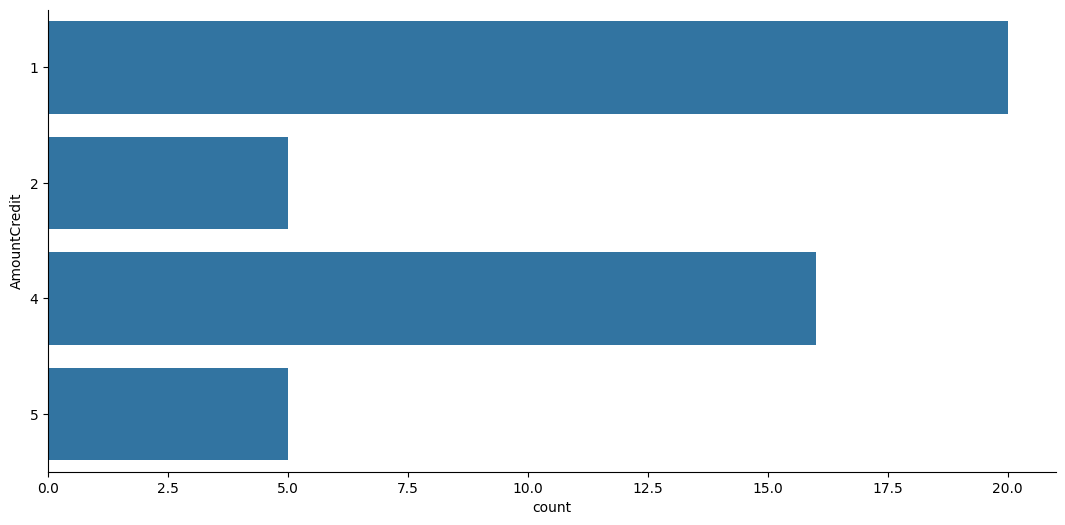

In [ ]:


def amountCredit(dataframe):
    dataframe.loc[dataframe['AmountCredit'] <= 8750000, 'AmountCredit'] = 1
    dataframe.loc[(dataframe['AmountCredit'] > 8750000) & (dataframe['AmountCredit'] <= 16500000), 'AmountCredit'] = 2
    dataframe.loc[(dataframe['AmountCredit'] > 16500000) & (dataframe['AmountCredit'] <= 17650000), 'AmountCredit'] = 3
    dataframe.loc[(dataframe['AmountCredit'] > 17650000) & (dataframe['AmountCredit'] <= 235000000), 'AmountCredit'] = 4
    dataframe.loc[(dataframe['AmountCredit'] > 235000000) & (dataframe['AmountCredit'] <= 750000000), 'AmountCredit'] = 5

    return dataframe

amountCredit(prediksi);
plt.figure(figsize=(13,6))
sns.countplot(y='AmountCredit', data=prediksi)
sns.despine()

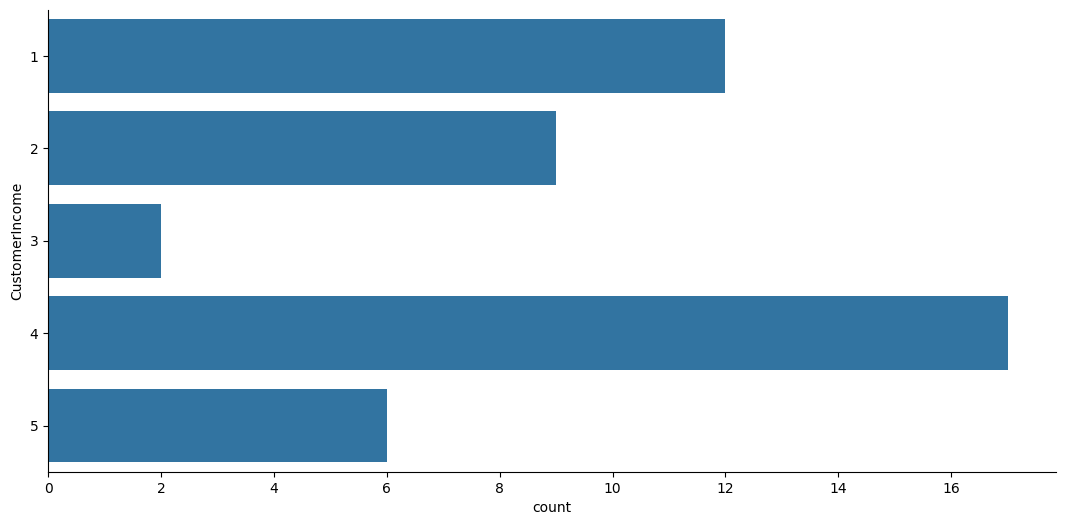

In [ ]:
def customerIncome(dataframe):
    dataframe.loc[dataframe['CustomerIncome'] <= 4200000, 'CustomerIncome'] = 1
    dataframe.loc[(dataframe['CustomerIncome'] > 4200000) & (dataframe['CustomerIncome'] <= 5800000), 'CustomerIncome'] = 2
    dataframe.loc[(dataframe['CustomerIncome'] > 5800000) & (dataframe['CustomerIncome'] <= 6600000), 'CustomerIncome'] = 3
    dataframe.loc[(dataframe['CustomerIncome'] > 6600000) & (dataframe['CustomerIncome'] <= 9200000), 'CustomerIncome'] = 4
    dataframe.loc[(dataframe['CustomerIncome'] > 9200000) & (dataframe['CustomerIncome'] <= 50010000000), 'CustomerIncome'] = 5

    return dataframe

customerIncome(prediksi);
plt.figure(figsize=(13,6))
sns.countplot(y='CustomerIncome', data=prediksi)
sns.despine()

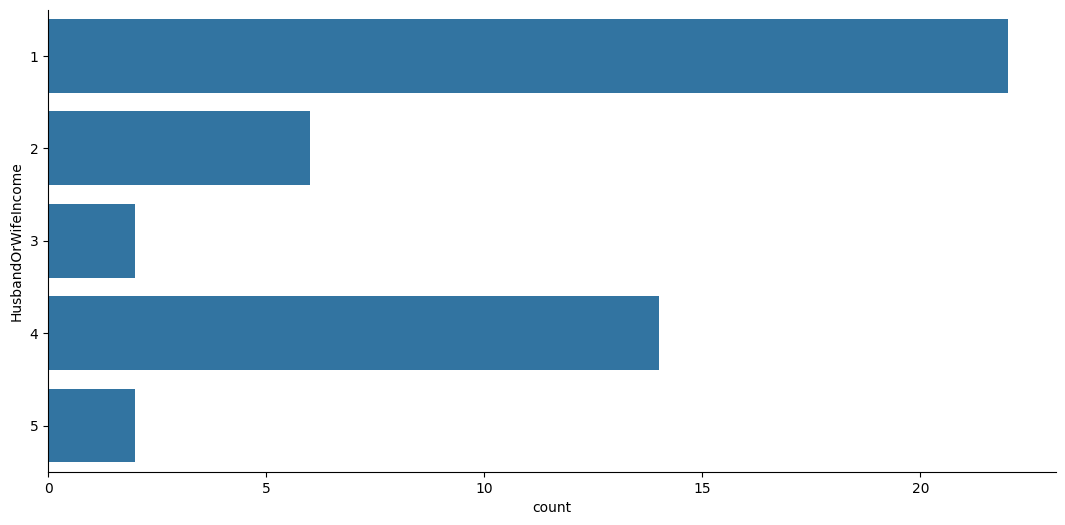

In [ ]:
def HusbandOrWifeIncome(dataframe):
    dataframe.loc[dataframe['HusbandOrWifeIncome'] <=  1900000, 'HusbandOrWifeIncome'] = 1
    dataframe.loc[(dataframe['HusbandOrWifeIncome'] >  1900000) & (dataframe['HusbandOrWifeIncome'] <= 2300000), 'HusbandOrWifeIncome'] = 2
    dataframe.loc[(dataframe['HusbandOrWifeIncome'] > 2300000) & (dataframe['HusbandOrWifeIncome'] <= 2500000), 'HusbandOrWifeIncome'] = 3
    dataframe.loc[(dataframe['HusbandOrWifeIncome'] > 2500000) & (dataframe['HusbandOrWifeIncome'] <= 3200000), 'HusbandOrWifeIncome'] = 4
    dataframe.loc[(dataframe['HusbandOrWifeIncome'] > 3200000) & (dataframe['HusbandOrWifeIncome'] <= 3500000), 'HusbandOrWifeIncome'] = 5

    return dataframe

HusbandOrWifeIncome(prediksi);
plt.figure(figsize=(13,6))
sns.countplot(y='HusbandOrWifeIncome', data=prediksi)
sns.despine()

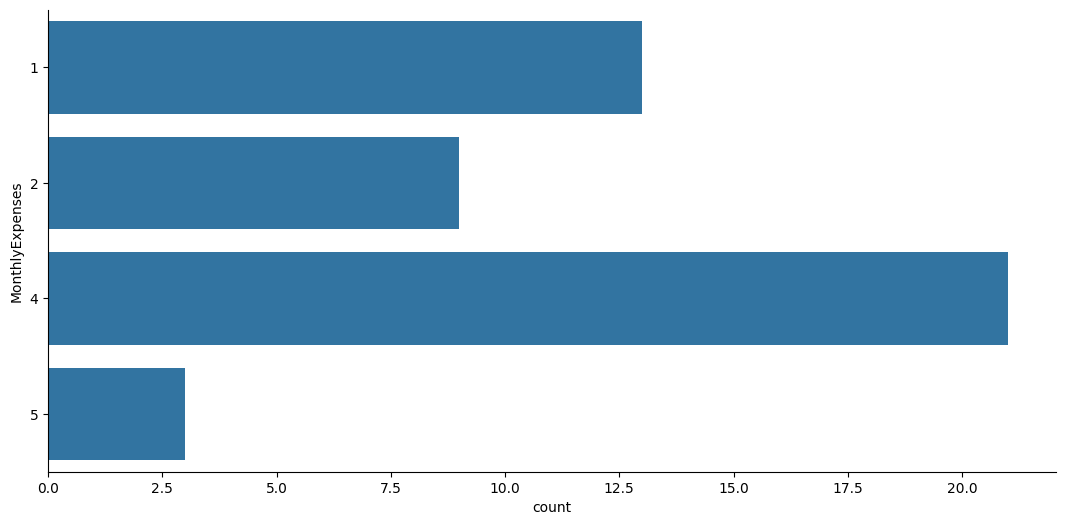

In [ ]:
def MonthlyExpenses(dataframe):
    dataframe.loc[dataframe['MonthlyExpenses'] <= 4020000, 'MonthlyExpenses'] = 1
    dataframe.loc[(dataframe['MonthlyExpenses'] > 4020000) & (dataframe['MonthlyExpenses'] <= 4980000), 'MonthlyExpenses'] = 2
    dataframe.loc[(dataframe['MonthlyExpenses'] > 4980000) & (dataframe['MonthlyExpenses'] <= 5400000), 'MonthlyExpenses'] = 3
    dataframe.loc[(dataframe['MonthlyExpenses'] > 5400000) & (dataframe['MonthlyExpenses'] <= 7080000), 'MonthlyExpenses'] = 4
    dataframe.loc[(dataframe['MonthlyExpenses'] > 7080000) & (dataframe['MonthlyExpenses'] <= 15470000), 'MonthlyExpenses'] = 5

    return dataframe
MonthlyExpenses(prediksi);
plt.figure(figsize=(13,6))
sns.countplot(y='MonthlyExpenses', data=prediksi)
sns.despine()

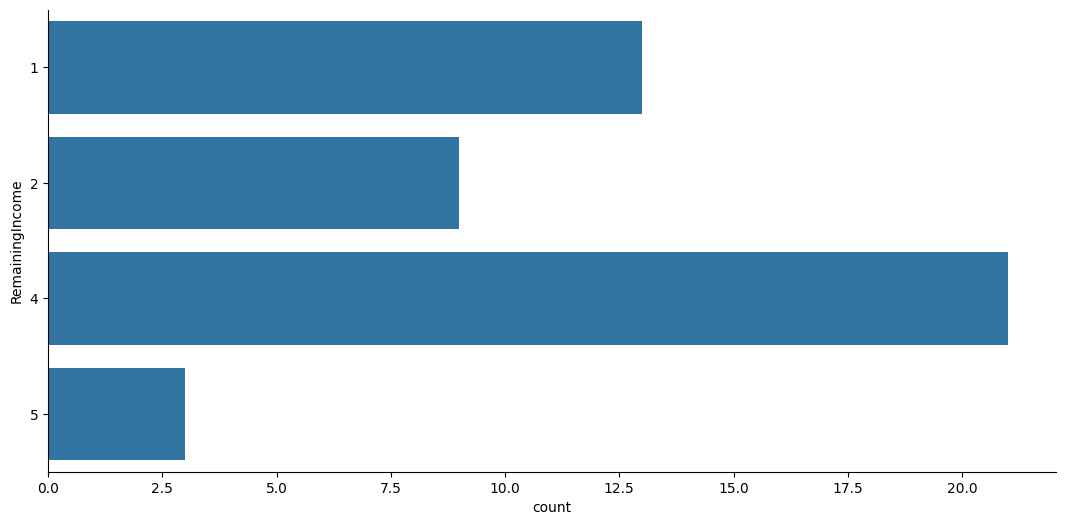

In [ ]:
def RemainingIncome(dataframe):
    dataframe.loc[dataframe['RemainingIncome'] <= 2680000, 'RemainingIncome'] = 1
    dataframe.loc[(dataframe['RemainingIncome'] > 2680000) & (dataframe['RemainingIncome'] <= 3320000), 'RemainingIncome'] = 2
    dataframe.loc[(dataframe['RemainingIncome'] > 3320000) & (dataframe['RemainingIncome'] <= 3600000), 'RemainingIncome'] = 3
    dataframe.loc[(dataframe['RemainingIncome'] > 3600000) & (dataframe['RemainingIncome'] <= 4720000), 'RemainingIncome'] = 4
    dataframe.loc[(dataframe['RemainingIncome'] > 4720000) & (dataframe['RemainingIncome'] <= 50005160000), 'RemainingIncome'] = 5

    return dataframe
RemainingIncome(prediksi);
plt.figure(figsize=(13,6))
sns.countplot(y='RemainingIncome', data=prediksi)
sns.despine()

In [ ]:
prediksi.head()

,IdCust,CreditFinancing,AmountCredit,TenorMonth,Age,City,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,DependentChildren,HomeStatus,RemainingIncome,Verification
0,CUST-001849,Mobile Phone,1,24,49.0,Balikpapan,11.0,4,4,4,1,Milik Sendiri Sudah Lunas,4,Survey
1,CUST-001849,Computer,2,24,39.0,Kutai Kartanegara,9.0,4,2,4,1,Kontrak,4,Survey
2,CUST-001849,Loan Funds,1,12,70.0,Balikpapan,10.0,4,4,4,1,Milik Sendiri Sudah Lunas,4,Survey
3,CUST-001849,Loan Funds,1,12,60.0,Kutai Kartanegara,11.0,1,1,1,1,Kontrak,1,Survey
4,CUST-001849,Loan Funds,1,12,54.0,Kutai Kartanegara,14.0,1,1,1,1,Milik Orang Tua,1,Deskcall


In [ ]:
label_data = prediksi
label_encoder = LabelEncoder()

for col in label_data[['CreditFinancing','City','HomeStatus','Verification']]:
  label_data[col] = label_encoder.fit_transform(label_data[col])

finalPrediksi=label_data
finalPrediksi.head()

,IdCust,CreditFinancing,AmountCredit,TenorMonth,Age,City,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,DependentChildren,HomeStatus,RemainingIncome,Verification
0,CUST-001849,4,1,24,49.0,0,11.0,4,4,4,1,4,4,2
1,CUST-001849,1,2,24,39.0,1,9.0,4,2,4,1,0,4,2
2,CUST-001849,3,1,12,70.0,0,10.0,4,4,4,1,4,4,2
3,CUST-001849,3,1,12,60.0,1,11.0,1,1,1,1,0,1,2
4,CUST-001849,3,1,12,54.0,1,14.0,1,1,1,1,1,1,0


In [ ]:
prediksi_nasabah.columns
prediksi_nasabah.isnull().sum()

,0
IdCust,0
SubmissionDate,0
CreditFinancing,0
AmountCredit,0
TenorMonth,0
CustomerName,0
PhoneNumber,0
Age,2
Address,0
SubDistrict,0


In [ ]:
Id = prediksi_nasabah['IdCust']
date = prediksi_nasabah['SubmissionDate']
creditFinancing = prediksi_nasabah['CreditFinancing']
amount = prediksi_nasabah['AmountCredit']
tenorM = prediksi_nasabah['TenorMonth']
nama = prediksi_nasabah['CustomerName']
usia = prediksi_nasabah['Age']
city = prediksi_nasabah['City']
pekerjaan = prediksi_nasabah['Position']
lengthWork = prediksi_nasabah['LengthOfWork']
penghasilan_nasabah = prediksi_nasabah['CustomerIncome']
penghasilanPasangan = prediksi_nasabah['HusbandOrWifeIncome']
pengeluaran = prediksi_nasabah['MonthlyExpenses']
sisa_penghasilan = prediksi_nasabah['RemainingIncome']
child = prediksi_nasabah['DependentChildren']
status_rumah = prediksi_nasabah['HomeStatus']
verifikasi = prediksi_nasabah['Verification']

In [ ]:
preds = pd.Series(xgb.predict(finalPrediksi.drop('IdCust', axis=1)), name = 'Prediksi')

result = pd.DataFrame()
result['IDCustomer'] = Id
result['SubmissionDate'] = date
result['CreditFinancing'] = creditFinancing
result['AmountCredit'] = amount
result['TenorMonth']= tenorM
result['CustomerName'] = nama
result['Age'] = usia
result['City'] = city
result['Position'] = pekerjaan
result['LengthOfWork'] = lengthWork
result['CustomerIncome'] = penghasilan_nasabah
result['HusbandOrWifeIncome'] = penghasilanPasangan
result['MonthlyExpenses'] = pengeluaran
result['RemainingIncome'] = sisa_penghasilan
result['DepedentChildren'] = child
result['HomeStatus'] = status_rumah
result['Verifikasi'] = verifikasi

result['Prediksi'] = preds
mapping = {0:'Approve', 1:'Reject'}
result = result.replace({'Prediksi':mapping})

result.to_csv("drive/MyDrive/training/Hasil_Prediksi_Nasabah_BankMega.csv", index=False)

In [ ]:
result.head()

,IDCustomer,SubmissionDate,CreditFinancing,AmountCredit,TenorMonth,CustomerName,Age,City,Position,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,RemainingIncome,DepedentChildren,HomeStatus,Verifikasi,Prediksi
0,CUST-001849,8/9/2024,Mobile Phone,8700000,24,Beni Tito Anggoro,49.0,Balikpapan,Pt Mitra Tri Daya Utama,11.0,7100000,2900000,6000000,4000000,1,Milik Sendiri Sudah Lunas,Survey,Approve
1,CUST-001849,8/9/2024,Computer,16500000,24,Benny Robiantoro,39.0,Kutai Kartanegara,Operator /Buruh/Tenlap,9.0,8000000,2000000,6000000,4000000,1,Kontrak,Survey,Approve
2,CUST-001849,8/9/2024,Loan Funds,5500000,12,Berto M S Adsio Aritonang,70.0,Balikpapan,Pedagang Pakaian,10.0,8100000,3000000,6660000,4440000,1,Milik Sendiri Sudah Lunas,Survey,Approve
3,CUST-001849,5/13/2024,Loan Funds,2500000,12,Bervin Ornella,60.0,Kutai Kartanegara,Pns Honorer,11.0,3000000,1600000,2760000,1840000,1,Kontrak,Survey,Reject
4,CUST-001849,4/16/2024,Loan Funds,7525000,12,Beti Nurbaeti,54.0,Kutai Kartanegara,Operator /Buruh/Tenlap,14.0,3200000,1500000,2820000,1880000,1,Milik Orang Tua,Deskcall,Reject


In [ ]:
result[result['Prediksi'].isin(['Reject'])]

,IDCustomer,SubmissionDate,CreditFinancing,AmountCredit,TenorMonth,CustomerName,Age,City,Position,LengthOfWork,CustomerIncome,HusbandOrWifeIncome,MonthlyExpenses,RemainingIncome,DepedentChildren,HomeStatus,Verifikasi,Prediksi
3,CUST-001849,5/13/2024,Loan Funds,2500000,12,Bervin Ornella,60.0,Kutai Kartanegara,Pns Honorer,11.0,3000000,1600000,2760000,1840000,1,Kontrak,Survey,Reject
4,CUST-001849,4/16/2024,Loan Funds,7525000,12,Beti Nurbaeti,54.0,Kutai Kartanegara,Operator /Buruh/Tenlap,14.0,3200000,1500000,2820000,1880000,1,Milik Orang Tua,Deskcall,Reject
14,CUST-001849,10/17/2024,House,520000000,72,Try Haryono,34.0,Balikpapan,Biro Jasa,8.0,5300000,1700000,4200000,2800000,1,Milik Orang Tua,Survey,Reject
15,CUST-001849,11/20/2024,Car,350000000,72,Tugas Irawan,30.0,Balikpapan,Bengkel Motor/ Sepeda,12.0,4400000,1800000,3720000,2480000,2,Kontrak,Survey,Reject
16,CUST-001849,9/5/2024,Motor Cycle,21900000,36,Tuminah,NaN,Balikpapan,Tentara,10.0,7500000,3200000,6420000,4280000,2,Kontrak,Survey,Reject
18,CUST-001849,7/1/2024,Loan Funds,4500000,12,Tusih Rusmawati,36.0,Balikpapan,Staff,NaN,8600000,2300000,6540000,4360000,2,Milik Sendiri Sudah Lunas,Survey,Reject
20,CUST-001849,10/17/2024,Mobile Phone,8750000,24,Tya Maharani Udaya,76.0,Kutai Kartanegara,Pedagang Hp & Accecoris,8.0,10300000,3000000,7980000,5320000,2,Milik Sendiri Sudah Lunas,Survey,Reject
27,CUST-001849,9/6/2024,Loan Funds,8700000,12,Mochammad Akbar Mustafi,72.0,Balikpapan,Pedagang Sembako,11.0,5000000,2800000,4680000,3120000,3,Milik Sendiri Sudah Lunas,Survey,Reject
31,CUST-001849,11/20/2024,Car,235000000,36,Mohammad Fariz,78.0,Kutai Kartanegara,Warung Sembako,12.0,10500000,2000000,7500000,5000000,0,Milik Sendiri Sudah Lunas,Survey,Reject
35,CUST-001849,11/20/2024,Car,235000000,36,Mudjianto,43.0,Balikpapan,Toko Sembako,7.0,5900000,1800000,4620000,3080000,1,Milik Sendiri Sudah Lunas,Survey,Reject


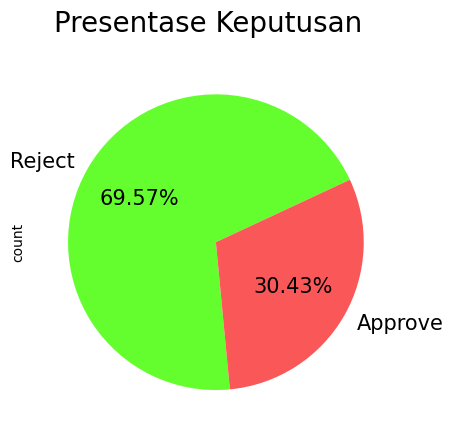

In [ ]:
color = ["#64FE2E","#FA5858"]
labels = "Reject","Approve"
plt.suptitle("Presentase Keputusan", fontsize=20)
result["Prediksi"].value_counts().plot.pie(autopct='%1.2f%%',
                                           colors=color,
                                           fontsize=15,
                                           labels=labels,
                                           startangle=25)
plt.show()

In [ ]:
data_final.isnull().sum()

,0
IdCust,0
CreditFinancing,0
AmountCredit,0
TenorMonth,0
Age,0
City,0
LengthOfWork,0
CustomerIncome,0
HusbandOrWifeIncome,0
MonthlyExpenses,0


<ipython-input-788-61eee92c8e98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.drop(to_drop, inplace=True, axis=1)


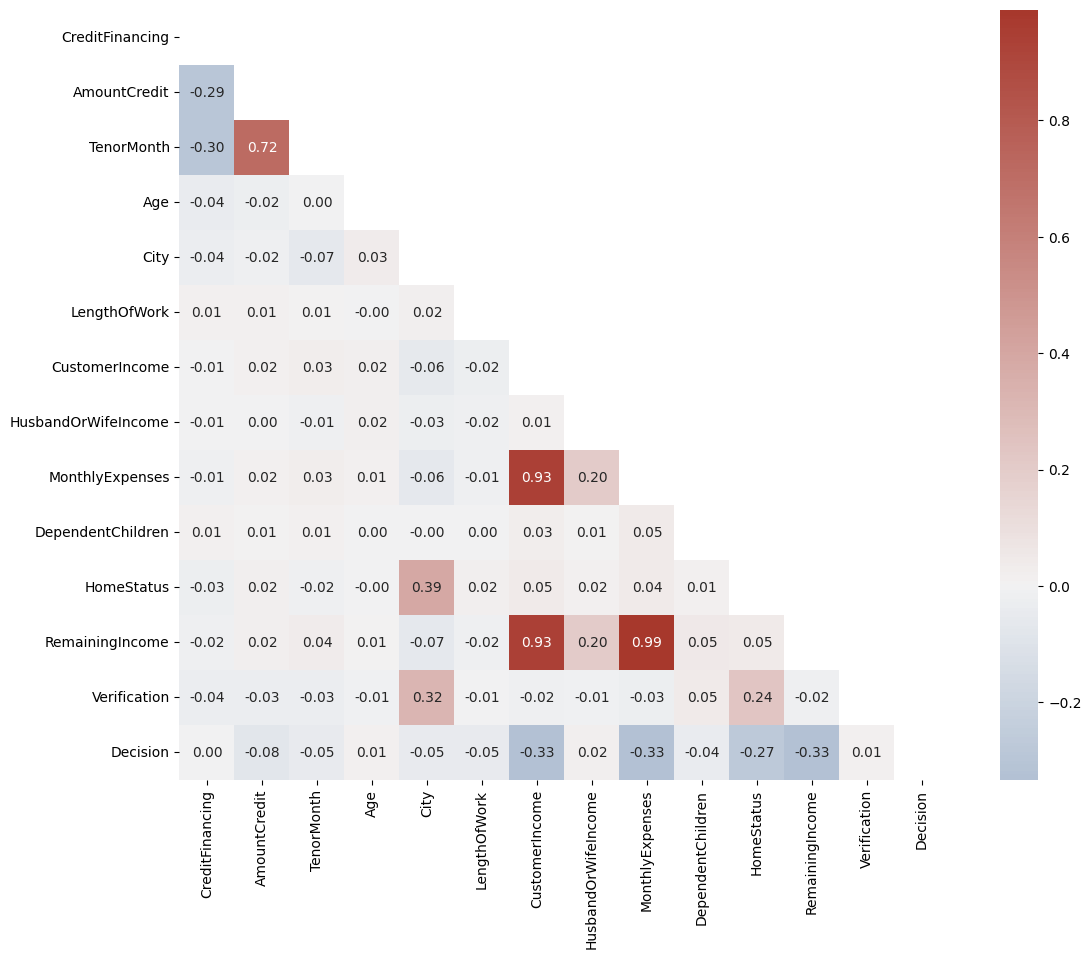

In [ ]:
to_drop = ['IdCust']
data_final.drop(to_drop, inplace=True, axis=1)
matrix = data_final.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

plt.figure(figsize=(13,10))
sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

plt.show()

In [ ]:
x = data_final.drop('Decision', axis=1)
y = data_final['Decision']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10) #80% : 20%

[0 1]


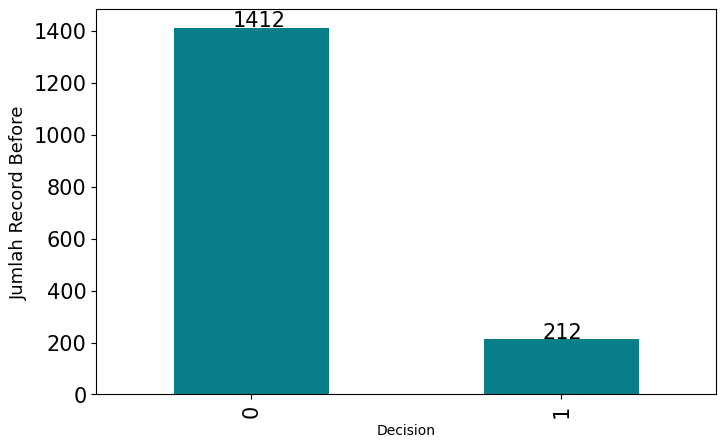

In [ ]:
print(data_final.Decision.unique())
Counter(data_final.Decision)
ax = data_final['Decision'].value_counts().plot(kind='bar', figsize=(8,5), fontsize=15, color='#087E88')
ax.set_ylabel('Jumlah Record Before', fontsize=13)

for i in ax.patches:
  ax.text(i.get_x() + 0.19, i.get_height() + 5, str(round(i.get_height(), 2)), fontsize=15)

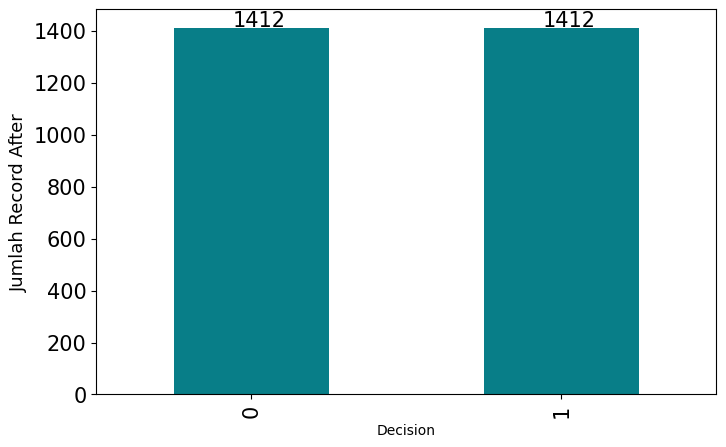

In [ ]:
sm = SMOTE(random_state=10, k_neighbors=10)
x_train_sm, y_train_sm = sm.fit_resample(x, y)
data_train = y_train_sm
ax = data_train.value_counts().plot(kind='bar', figsize=(8,5), fontsize=15, color='#087E88')
ax.set_ylabel('Jumlah Record After', fontsize=13)

for i in ax.patches:
  ax.text(i.get_x() + 0.19, i.get_height() + 5, str(round(i.get_height(), 2)), fontsize=15)

Modeling Machine Learning

Accuracy: 80.35%
Precision: 76.88%
Recall: 88.28%
F1 Score: 82.18%
[[198  77]
 [ 34 256]]


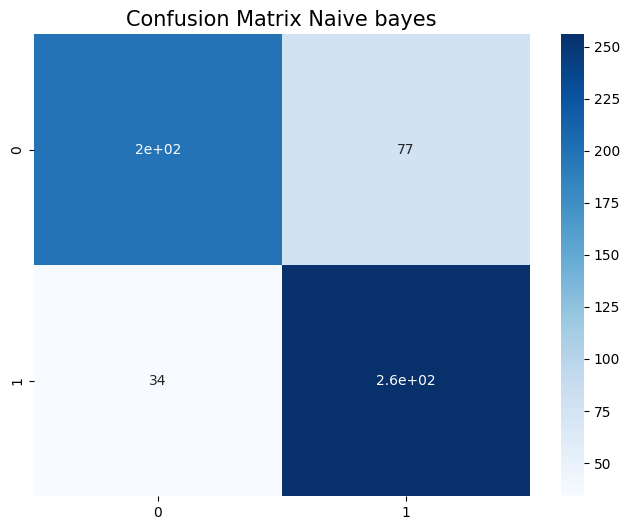

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train_sm, y_train_sm, test_size=0.20, random_state=10)

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_predicted = nb.predict(x_test)
nb_acc_score = accuracy_score(y_test, nb_predicted)
nb_prc_score = precision_score(y_test, nb_predicted)
nb_rec_score = recall_score(y_test, nb_predicted)
nb_f1_score = f1_score(y_test, nb_predicted)

print("Accuracy: %.2f%%" % (nb_acc_score*100))
print("Precision: %.2f%%" % (nb_prc_score*100))
print("Recall: %.2f%%" % (nb_rec_score*100))
print("F1 Score: %.2f%%" % (nb_f1_score*100))

cm = confusion_matrix(y_test, nb_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Naive bayes', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')
nb_conf_matrix = confusion_matrix(y_test, nb_predicted)
print(nb_conf_matrix)

Accuracy: 86.37%
Precision: 84.47%
Recall: 90.00%
F1 Score: 87.15%
[[227  48]
 [ 29 261]]


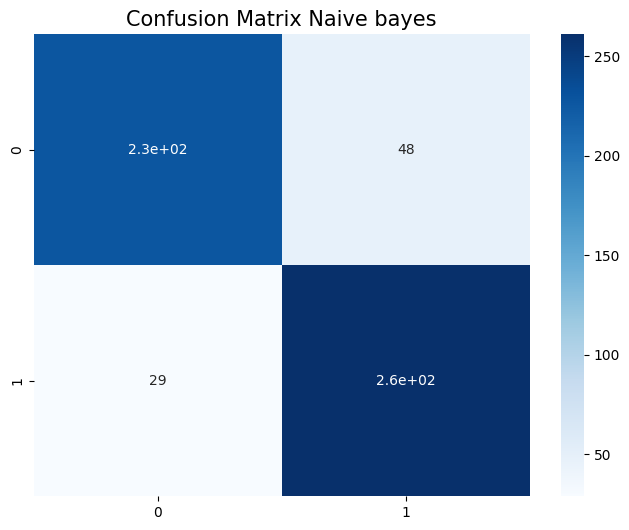

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train_sm, y_train_sm, test_size=0.20, random_state=10)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_acc_score = accuracy_score(y_test, knn_predicted)
knn_prc_score = precision_score(y_test, knn_predicted)
knn_rec_score = recall_score(y_test, knn_predicted)
knn_f1_score = f1_score(y_test, knn_predicted)

print("Accuracy: %.2f%%" % (knn_acc_score*100))
print("Precision: %.2f%%" % (knn_prc_score*100))
print("Recall: %.2f%%" % (knn_rec_score*100))
print("F1 Score: %.2f%%" % (knn_f1_score*100))

cm = confusion_matrix(y_test, knn_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Naive bayes', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
print(knn_conf_matrix)

Accuracy: 92.39%
Precision: 93.64%
Recall: 91.38%
F1 Score: 92.50%
[[257  18]
 [ 25 265]]


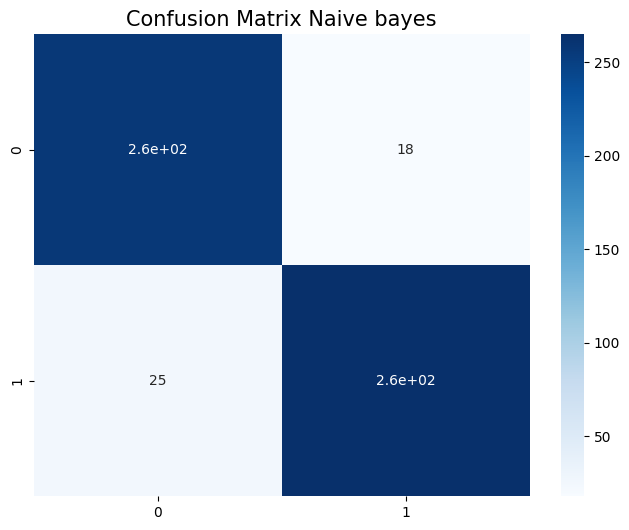

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train_sm, y_train_sm, test_size=0.20, random_state=10)

dt = DecisionTreeClassifier(criterion='entropy', random_state=10)

dt.fit(x_train, y_train) #data training / data yg akan dipelajari algoritmanya
dt_predicted = dt.predict(x_test) #20% itulah yang akan di uji akurasi, presisi, dst.

dt_acc_score = accuracy_score(y_test, dt_predicted)
dt_prc_score = precision_score(y_test, dt_predicted)
dt_rec_score = recall_score(y_test, dt_predicted)
dt_f1_score = f1_score(y_test, dt_predicted)

print("Accuracy: %.2f%%" % (dt_acc_score*100))
print("Precision: %.2f%%" % (dt_prc_score*100))
print("Recall: %.2f%%" % (dt_rec_score*100))
print("F1 Score: %.2f%%" % (dt_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, dt_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Naive bayes', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
print(dt_conf_matrix)

Accuracy: 89.38%
Precision: 95.28%
Recall: 83.45%
F1 Score: 88.97%
[[263  12]
 [ 48 242]]


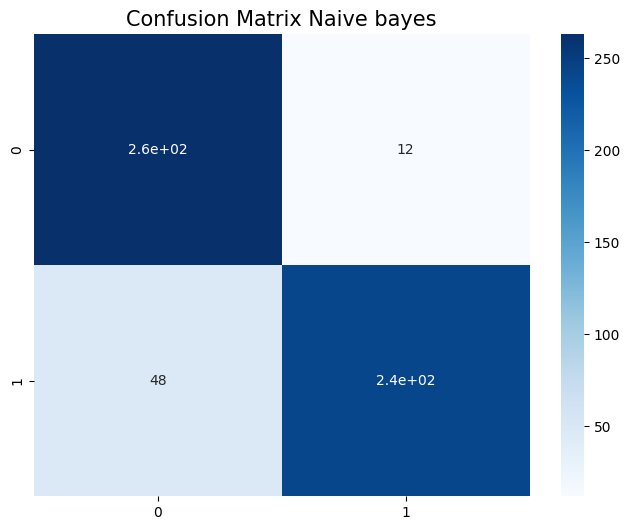

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train_sm, y_train_sm, test_size=0.20, random_state=10) #80% train : 20% test

rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=2, random_state=10)

rf.fit(x_train, y_train) #data training / data yg akan dipelajari algoritmanya
rf_predicted = rf.predict(x_test) #20% itulah yang akan di uji akurasi, presisi, dst.

rf_acc_score = accuracy_score(y_test, rf_predicted)
rf_prc_score = precision_score(y_test, rf_predicted)
rf_rec_score = recall_score(y_test, rf_predicted)
rf_f1_score = f1_score(y_test, rf_predicted)

print("Accuracy: %.2f%%" % (rf_acc_score*100))
print("Precision: %.2f%%" % (rf_prc_score*100))
print("Recall: %.2f%%" % (rf_rec_score*100))
print("F1 Score: %.2f%%" % (rf_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, rf_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Naive bayes', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
print(rf_conf_matrix)

Accuracy: 81.24%
Precision: 80.87%
Recall: 83.10%
F1 Score: 81.97%
[[218  57]
 [ 49 241]]


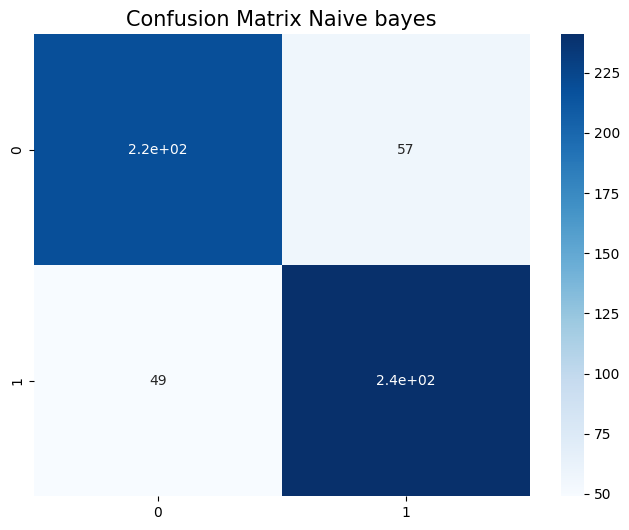

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train_sm, y_train_sm, test_size=0.20, random_state=10) #80% train : 20% test

et = ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_depth=2, random_state=10)

et.fit(x_train, y_train) #data training / data yg akan dipelajari algoritmanya
et_predicted = et.predict(x_test) #20% itulah yang akan di uji akurasi, presisi, dst.

et_acc_score = accuracy_score(y_test, et_predicted)
et_prc_score = precision_score(y_test, et_predicted)
et_rec_score = recall_score(y_test, et_predicted)
et_f1_score = f1_score(y_test, et_predicted)

print("Accuracy: %.2f%%" % (et_acc_score*100))
print("Precision: %.2f%%" % (et_prc_score*100))
print("Recall: %.2f%%" % (et_rec_score*100))
print("F1 Score: %.2f%%" % (et_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, et_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Naive bayes', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
et_conf_matrix = confusion_matrix(y_test, et_predicted)
print(et_conf_matrix)

[LightGBM] [Info] Number of positive: 1122, number of negative: 1137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 2259, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496680 -> initscore=-0.013280
[LightGBM] [Info] Start training from score -0.013280
Accuracy: 95.75%
Precision: 96.83%
Recall: 94.83%
F1 Score: 95.82%
[[266   9]
 [ 15 275]]


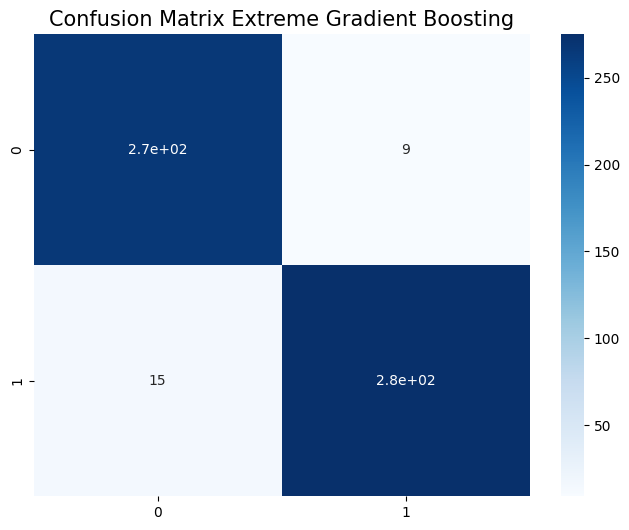

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train_sm, y_train_sm, test_size=0.20, random_state=10) #80% train : 20% test


lgb = lgb.LGBMClassifier()

lgb.fit(x_train, y_train) #data training / data yg akan dipelajari algoritmanya
lgb_predicted = lgb.predict(x_test) #20% itulah yang akan di uji akurasi, presisi, dst.

lgb_acc_score = accuracy_score(y_test, lgb_predicted)
lgb_prc_score = precision_score(y_test, lgb_predicted)
lgb_rec_score = recall_score(y_test, lgb_predicted)
lgb_f1_score = f1_score(y_test, lgb_predicted)

print("Accuracy: %.2f%%" % (lgb_acc_score*100))
print("Precision: %.2f%%" % (lgb_prc_score*100))
print("Recall: %.2f%%" % (lgb_rec_score*100))
print("F1 Score: %.2f%%" % (lgb_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, lgb_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Extreme Gradient Boosting', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
lgb_conf_matrix = confusion_matrix(y_test, lgb_predicted)
print(lgb_conf_matrix)

Accuracy: 95.93%
Precision: 97.51%
Recall: 94.48%
F1 Score: 95.97%
[[268   7]
 [ 16 274]]


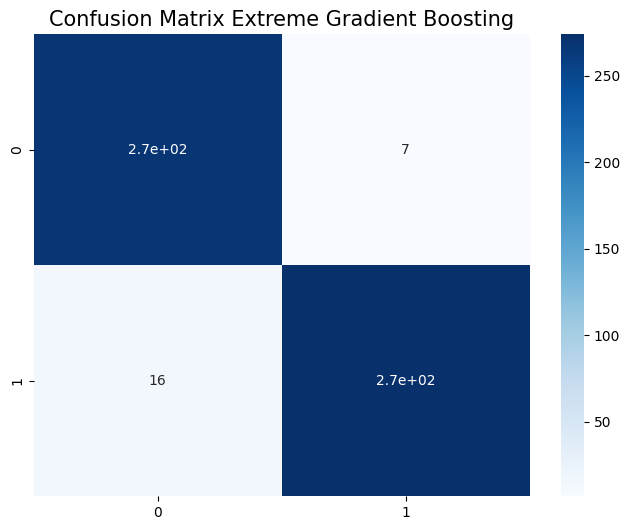

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train_sm, y_train_sm, test_size=0.20, random_state=10) #80% train : 20% test

xgb = XGBClassifier()

xgb.fit(x_train, y_train) #data training / data yg akan dipelajari algoritmanya
xgb_predicted = xgb.predict(x_test) #20% itulah yang akan di uji akurasi, presisi, dst.

xgb_acc_score = accuracy_score(y_test, xgb_predicted)
xgb_prc_score = precision_score(y_test, xgb_predicted)
xgb_rec_score = recall_score(y_test, xgb_predicted)
xgb_f1_score = f1_score(y_test, xgb_predicted)

print("Accuracy: %.2f%%" % (xgb_acc_score*100))
print("Precision: %.2f%%" % (xgb_prc_score*100))
print("Recall: %.2f%%" % (xgb_rec_score*100))
print("F1 Score: %.2f%%" % (xgb_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, xgb_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Extreme Gradient Boosting', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
print(xgb_conf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 84.07%
Precision: 85.46%
Recall: 83.10%
F1 Score: 84.27%
[[234  41]
 [ 49 241]]


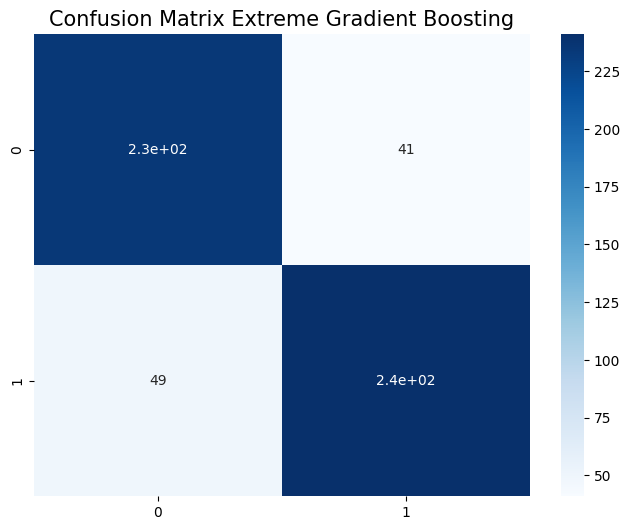

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train_sm, y_train_sm, test_size=0.20, random_state=10) #80% train : 20% test

lr = LogisticRegression()

lr.fit(x_train, y_train) #data training / data yg akan dipelajari algoritmanya
lr_predicted = lr.predict(x_test) #20% itulah yang akan di uji akurasi, presisi, dst.

lr_acc_score = accuracy_score(y_test, lr_predicted)
lr_prc_score = precision_score(y_test, lr_predicted)
lr_rec_score = recall_score(y_test, lr_predicted)
lr_f1_score = f1_score(y_test, lr_predicted)

print("Accuracy: %.2f%%" % (lr_acc_score*100))
print("Precision: %.2f%%" % (lr_prc_score*100))
print("Recall: %.2f%%" % (lr_rec_score*100))
print("F1 Score: %.2f%%" % (lr_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, lr_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Extreme Gradient Boosting', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)
print(lr_conf_matrix)

In [ ]:
model_evaluation = pd.DataFrame({
    'Model': ['Naive Bayes', 'K-Nearest Neighbor', 'DT', 'RF', 'ET', 'XGB', 'LGB', 'LR'],
    'Accuracy': [nb_acc_score*100, knn_acc_score*100, dt_acc_score*100, rf_acc_score*100, et_acc_score*100, xgb_acc_score*100, lgb_acc_score*100, lr_acc_score*100],
    'Precision': [nb_prc_score*100, knn_prc_score*100, dt_prc_score*100, rf_prc_score*100, et_prc_score*100, xgb_prc_score*100, lgb_prc_score*100, lr_prc_score*100],
    'Recall': [nb_rec_score*100, knn_rec_score*100, dt_rec_score*100, rf_rec_score*100, et_rec_score*100, xgb_rec_score*100, lgb_rec_score*100, lr_rec_score*100],
    'F1 Score': [nb_f1_score*100, knn_f1_score*100, dt_f1_score*100, rf_f1_score*100, et_f1_score*100, xgb_f1_score*100, lgb_f1_score*100, lr_f1_score*100]
})
model_evaluation['Average'] = model_evaluation[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1)
for col in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Average']:
    model_evaluation[col] = model_evaluation[col].apply(lambda x: "%.2f%%" % x)
print(model_evaluation)

                Model Accuracy Precision  Recall F1 Score Average
0         Naive Bayes   80.35%    76.88%  88.28%   82.18%  81.92%
1  K-Nearest Neighbor   86.37%    84.47%  90.00%   87.15%  87.00%
2                  DT   92.39%    93.64%  91.38%   92.50%  92.48%
3                  RF   89.38%    95.28%  83.45%   88.97%  89.27%
4                  ET   81.24%    80.87%  83.10%   81.97%  81.80%
5                 XGB   95.93%    97.51%  94.48%   95.97%  95.97%
6                 LGB   95.75%    96.83%  94.83%   95.82%  95.81%
7                  LR   84.07%    85.46%  83.10%   84.27%  84.23%


In [ ]:
#Grid Search Algorithm

param_grid = {'criterion' : ['gini','entropy'],
              'splitter' : ['best','random'],
              'max_depth' : [1,2,3,4,5,6,7,8,10,12],
              'min_samples_split' : [1,2,3,4,5,6,7,8,10,12],
              'min_samples_leaf' : [1,2,3,4,5,6,7,8,10,12],
              'max_features' : [1,2,3,4,5],
              'random_state' : [0,1,2,3,4,5,6,7,8,10,12]
              }

dtc = DecisionTreeClassifier()

grid = GridSearchCV(dtc, param_grid, scoring='accuracy', refit= True, verbose=1, n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(x_train_sm, y_train_sm, test_size=0.20, random_state=10)
grid.fit(x_train, y_train)

#mencetak hasil pemilihan parameter terbaik
print(grid.best_params_)
print(grid.best_estimator_)

grid_predicted = grid.predict(x_test)
grid_acc_score = accuracy_score(y_test, grid_predicted)

print("Accuracy: %.2f%%" % (grid_acc_score*100))

Fitting 5 folds for each of 220000 candidates, totalling 1100000 fits
